<a id='back'></a>
# Table of Contents

* [Intro](#intro)
* [Step 1. Download and prepare data for analysis](#step1)
     * [1.1 Import library](#step1.1)
     * [1.2 Data initialization](#step1.2)
         * [1.2.1 Dataframe rest_df](#step1.2.1)
     * [1.3 Preprocessing Dataframe rest_df](#step1.3)
         * [1.3.1 Resolve missing values](#step1.3.1)
         * [1.3.2 Column `object_type`](#step1.3.2)
         * [1.3.3 Column `chain`](#step1.3.3)
         * [1.3.4 Column `business_name`](#step1.3.4)
* [Step 2. Data analysis](#step2)
     * [2.1 Research the proportions of different types of business. Create the graph](#step2.1)
         * [2.1.1 Graph of proportions of various types of business](#step2.1.1)
     * [2.2 Examine the proportion of franchise and non-franchise based businesses. Create the graph](#step2.2)
         * [2.2.1 Graph of the proportion of franchise and non-franchise based businesses](#step2.2.1)
     * [2.3 Which type of business is usually a franchise-based business?](#step2.3)
         * [2.3.1 Dataframe `franchise_df`](#step2.3.1)
         * [2.3.2 Dataframe `non_franchise_df`](#step2.3.2)
         * [2.3.3 Bar Chart comparing Franchise and Non-Franchise](#step2.3.3)
         * [2.3.4 Pie Chart comparing Franchise and Non-Franchise](#step2.3.4)
     * [2.4 Which are the characteristics of a franchise-based type of business: having many places with a small number of seats or having several places with a large number of seats?](#step2.4)
     * [2.5 Determine the average number of seats for each type of business. On average, which type of business has the largest number of seats? Create the graph](#step2.5)
     * [2.6 Move street name data from address column to separate column](#step2.6)
     * [2.7 Create a graph showing the top ten street names by number of businesses (eating places)](#step2.7)
     * [2.8 Find the number of streets that have only one business (eating place)](#step2.8)
     * [2.9 For streets occupied by many businesses (eating places), pay attention to the distribution of the number of seats. What trends can you observe?](#step2.9)
     * [2.10 Make general conclusions and provide recommendations regarding the type of business and number of seats. Provide comments about franchise-based business development opportunities.](#step2.10)
* [Step 3. Preparing the presentation](#step3)

<a id='intro'></a>
## Introduction

Project description
<br>You have decided to open a small cafe in Los Angeles. Your cafe can be said to be quite unique because you "employ" robots as waiters or waitresses. This project is indeed promising, but requires large capital. Therefore, you and your partners decided to attract investors to want to invest. They're interested in current market conditions—but can you maintain your success when the robot's appeal fades?
Considering that you are an analysis expert, the partners also ask you to prepare a number of market research. You have open-source data regarding the types of dining businesses in LA.


<br>Data description
<br>rest_data table:
- object_name — business name
- chain — franchise-based business (TRUE/FALSE)
- object_type — business type
- address — address
- number — number of seats

[Back to Table of Contents](#back)

<a id='step1'></a>
## Step 1. Download the data and prepare it for analysis
<a id='step1.1'></a>
### 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import viridis
from matplotlib.patheffects import withStroke
import seaborn as sns
import re

[Back to Table of Contents](#back)

<a id='step1.2'></a>
### 1.2 Data initialization

In [2]:
rest_df = pd.read_csv('/datasets/rest_data_us.csv')

<a id='step1.2.1'></a>
#### 1.2.1 Dataframe rest_df

Show general information

In [3]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Display the contents of the dataframe

In [4]:
rest_df

id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S          100 WORLD WAY # 120  False   
2     11788       STREET CHURROS    6801 HOLLYWOOD BLVD # 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9646  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9647  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9648  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9649  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9650  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number  
0           Cafe      26  
1     Restaurant       9  
2      Fast Food      20  
3     Restaurant      22  
4     Restaurant      20  
...          ...     ...  
9646  Restaurant     122  
9647  Restaurant      93  
9648   Fast Food      15  
9649        Cafe       6  
9650  Restaurant      19  

[9651 rows x 6 columns]

[Back to Table of Contents](#back)

<a id='step1.3'></a>
### 1.3 Preprocessing Dataframe rest_df

Check for duplicate data

In [5]:
rest_df.duplicated().sum()

0

Rename columns

In [6]:
rest_df = rest_df.rename(columns={'object_name': 'business_name',
                                  'chain': 'franchise',
                                  'object_type': 'business_type',
                                  'number': 'number_seats'})

Check the column name after changing it

In [7]:
rest_df.columns

Index(['id', 'business_name', 'address', 'franchise', 'business_type',
       'number_seats'],
      dtype='object')

**Conclusion**
1. Row Duplication Check: rest_df.duplicated().sum() shows that there are no duplicate rows in your DataFrame.

2. Column Renaming: You use the rename method to rename columns in a DataFrame. The changed column names are as follows:

<br>'object_name' becomes 'business_name'
<br>'chain' becomes 'franchise'
<br>'object_type' becomes 'business_type'
<br>'number' becomes 'number_seats'

Column Name Update: The current column names are:

<br>'id'
<br>'business_name'
<br>'address'
<br>'franchise'
<br>'business_type'
<br>'number_seats'

<a id='step1.3.1'></a>
#### 1.3.1 Resolve missing values

Check for missing values

In [8]:
rest_df.isna().sum()

id               0
business_name    0
address          0
franchise        3
business_type    0
number_seats     0
dtype: int64

Calculates the percentage of blank values

In [9]:
missing_percentage = (rest_df.isna().mean() * 100).round(2).astype(str) + '%'
missing_percentage


id                0.0%
business_name     0.0%
address           0.0%
franchise        0.03%
business_type     0.0%
number_seats      0.0%
dtype: object

Returns columns containing missing values

In [10]:
# Identify missing values in a DataFrame
missing_values = rest_df[rest_df.isna().any(axis=1)]

# Displays rows containing empty values
missing_values


id            business_name               address franchise  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD       NaN   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD       NaN   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST       NaN   

     business_type  number_seats  
7408    Restaurant            14  
7523         Pizza             1  
8648    Restaurant            35

Removing columns containing nan due to its very small percentage of 0.03%

In [11]:
rest_df=rest_df.dropna()

Double check for missing values

In [12]:
rest_df.isna().sum()

id               0
business_name    0
address          0
franchise        0
business_type    0
number_seats     0
dtype: int64

Dataframe `rest_df` no longer has missing values

**Conclusion**

1. Checking and Percentage of Missing Values:
- There are no duplicate values in the DataFrame (rest_df.duplicated().sum() returns the value 0).
- Column 'franchise' has 3 missing values (rest_df.isna().sum() shows 3 missing values).
- The percentage of missing values in a column is given by missing_percentage.
2. Identify and Display Rows with Blank Values:
- Rows containing empty values have been identified and displayed in the missing_values DataFrame.
3. Deletion of Rows with Blank Values:
- Rows with empty values were removed from the DataFrame using rest_df.dropna().
4. Verify No Blank Values After Deletion:
- After removal of empty values, the result of rest_df.isna().sum() shows there are no more empty values in the DataFrame.

<br>In conclusion, after dealing with empty values, DataFrame rest_df no longer has empty values and can be used for further analysis.

<a id='step1.3.2'></a>
#### 1.3.2 Column `business_type`

Returns the unique value `business_type`

In [13]:
rest_df['business_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

Returns the data type `business_type`

In [14]:
rest_df['business_type'].dtypes

dtype('O')

Changed the `business_type` column to a category data type, to facilitate data analysis

In [15]:
# Use .copy() when taking slices from a DataFrame
rest_df = rest_df.copy()
rest_df['business_type'] = rest_df['business_type'].astype('category')

Checking `business_type` data type after change

In [16]:
rest_df['business_type'].dtypes

CategoricalDtype(categories=['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'], ordered=False, categories_dtype=object)

**Conclusion**

1. Unique Values in Column 'business_type':
- The business type in the 'business_type' column has unique values such as 'Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', and 'Pizza'.
2. Initial Data Type Column 'business_type':
- The original data type of the 'business_type' column is object (dtype('O')).
3. Convert to Category Data Type:
- You use .copy() when taking slices from a DataFrame to ensure changes do not affect the original DataFrame.
- Column 'business_type' has been converted to category data type using astype('category').
4. Verify Data Type After Change:
- After the change, the data type of the 'business_type' column is now CategoricalDtype with the correct category.


In conclusion, you have successfully changed the data type of the 'business_type' column to category, which can be useful in some analyses, especially if the column has a limited number of values

<a id='step1.3.3'></a>
#### 1.3.3 Column `franchise`

Returns the unique `franchise` value

In [17]:
rest_df['franchise'].unique()

array([False, True], dtype=object)

Returns the `franchise` data type

In [18]:
rest_df['franchise'].dtypes

dtype('O')

Changed the `franchise` column to a boolean data type, as it only contains False and True

In [19]:
rest_df['franchise'] = rest_df['franchise'].astype(bool)

Checking `franchise` data type after change

In [20]:
rest_df['franchise'].dtypes

dtype('bool')

**Conclusion**

1. Unique Values in the 'franchise' Column:
- The 'franchise' column has unique values 'False' and 'True', indicating whether a business is a franchise or not.
2. Initial Data Type Column 'franchise':
- The original data type of the 'franchise' column is object (dtype('O')).
3. Convert to Boolean Data Type:
- You change the data type of the 'franchise' column to boolean by using .astype(bool).
4. Verify Data Type After Change:
- After the change, the data type of the 'franchise' column is now boolean (dtype('bool')).

  
In conclusion, you have successfully changed the data type of the 'franchise' column to boolean, which is more suitable for binary data representation such as 'True' or 'False'. This can facilitate analysis involving this column.

<a id='step1.3.4'></a>
#### 1.3.4 Column `business_name`

Make a copy of the 'business_name' column and name it 'business_name_copy'

In [21]:
rest_df['business_name_copy'] = rest_df['business_name'].copy()


Make all text in the 'business name copy' column uppercase

In [22]:
rest_df['business_name_copy'] = rest_df['business_name'].str.upper()


Counts the number of uniques in `business name copy`

In [23]:
len(rest_df['business_name_copy'].unique())

8669

Create a function to replace data that contains certain characters

In [24]:
def replace_if_contains(substring, replacement, column='business_name_copy'):
    rest_df.loc[rest_df[column].str.contains(substring, case=False, na=False), column] = replacement

# Define replacements
replace_if_contains('SUBWA', 'SUBWAY')
replace_if_contains('MCDONA', 'MCDONALD')
replace_if_contains('STARBUC', 'STARBUCKS')
replace_if_contains('CHICK FIL', 'CHICK FIL A')
replace_if_contains('WOKCAN', 'WOKCANO')
replace_if_contains('PANDA EXP', 'PANDA EXPRESS')
replace_if_contains('BACK HOU', 'BACK HOUSE')
replace_if_contains('TACO BE', 'TACO BELL')
replace_if_contains('DELTA SKY', 'DELTA SKY CLUB')
replace_if_contains('BASKIN ROB', 'BASKIN ROBBINS')
replace_if_contains('COFFEE BEAN AND TEA', 'THE COFFEE BEAN AND TEA LEAF')
replace_if_contains('TARGET', 'TARGET')
replace_if_contains('TAMALES ALBERT', 'TAMALES ALBERTO')
replace_if_contains('LAS CHAMP', 'LAS CHAMPAS')
replace_if_contains('JOSE CHIQUI', 'JOSE CHIQUITO')
replace_if_contains('BURGER KIN', 'BURGER KING')
replace_if_contains('BAK KUN', 'BAK KUNG')
replace_if_contains('HAGGE', 'HAGGEN')
replace_if_contains('AVENUE', 'AVENUE')
replace_if_contains('MARGARITA', 'MARGARITAS')
replace_if_contains('CLEO', 'CLEO')
replace_if_contains('LITTLE CEASAR', 'LITTLE CEASARS')
replace_if_contains('LA MAYOR', 'LA MAYOR DOMIA')
replace_if_contains('LOUISIANA FR', 'LOUISIANA FRIED CHICKEN')
replace_if_contains('NATUREWELL', 'NATUREWELL')
replace_if_contains('LA CHUPERI', 'LA CHUPERIA')
replace_if_contains('MITAKI JAPANSE RESTAURAN', 'MITAKI JAPANSE RESTAURANT')
replace_if_contains('UPSTAIR', 'UPSTAIRS')
replace_if_contains('JERSEY MIKE', 'JERSEY MIKE SUBS')
replace_if_contains('LA FAVORITA BAKERY', 'LA FAVORITA BAKERY')
replace_if_contains('7-ELE', '7 ELEVEN')
replace_if_contains('BACK HOU', 'BACK HOUSE')
replace_if_contains('PRIMO', 'PRIMO EXPRESS')
replace_if_contains('BACK HOU', 'BACK HOUSE')
replace_if_contains('PRIMO', 'PRIMO EXPRESS')
replace_if_contains('SKADDEN, ARPS', 'SKADDEN ARPS SLATE AND MEAGH')
replace_if_contains('BOBA - LOCA', 'BOBA LOCA TEA COFFEE')
replace_if_contains('LITTLE CAESA', 'LITTLE CAESAR')
replace_if_contains('YUM YUM', 'YUM YUM DONUT')
replace_if_contains('PIZZA, BEER,', 'PIZZA BEER AND WINGS')
replace_if_contains('BOBA TIME', 'IT BOBA TIME')
replace_if_contains("'S JR", 'CARL JR')
replace_if_contains("LS JR", 'CARL JR')
replace_if_contains('JACK IN', 'JACK IN THE BOX')
replace_if_contains('RALPH', 'RALPH MARKET')
replace_if_contains('JACOB', 'JACOB MARKET')
replace_if_contains('GREEN SPA', 'GREEN SPAN')
replace_if_contains('KENTUCKY', 'KENTUCKY FRIED CHICKEN')
replace_if_contains('KFC', 'KENTUCKY FRIED CHICKEN')
replace_if_contains('TACO BEL', 'TACO BELL')
replace_if_contains('WINCHELL', 'WINCHELL DONUTS HOUSE')
replace_if_contains('CHIPOTL', 'CHIPOTLE MEXICAN GRILL')
replace_if_contains('PAPA JOH', 'PAPA JOHN PIZZA')
replace_if_contains('CHURCH', 'CHURCH FRIED CHICKEN')
replace_if_contains('MR. PIZZ', 'MR PIZZA')
replace_if_contains('LAX-', 'LAXC')
replace_if_contains('DOMINO', 'DOMINO PIZZA')
replace_if_contains('PIZZA HU', 'PIZZA HUT')
replace_if_contains('EL POLLO', 'EL POLLO LOCO')
replace_if_contains('JERSEY MIK', 'JERSEY MIKE SUBS')
replace_if_contains('JACK IN', 'JACK IN THE BOX')
replace_if_contains('CHURCH', 'CHURCH FRIED CHICKEN')
replace_if_contains('AFC', 'AFC SUSHI')
replace_if_contains('BH MARR', 'BH MARRIOTT')
replace_if_contains('LOS ANGELES MISSION', 'LOS ANGELES MISSION')
replace_if_contains('MR PIZZ', 'MR PIZZA')


Create a function to delete certain characters

In [25]:
replacements = {'<U+2019>': "'", '#1 ': '1 ', '#2 ': '2 ', 'DONUTS': 'DONUT', 'BURGERS': 'BURGER', "'S": "", " LLC": "",
                " INC": "", "!": "", 'CHINA TOWN':'CHINATOWN ', 'SANDWICHES': 'SANDWICH', 'TACOS': 'TACO', ' "N" ': ' AND ', 'B B Q': 'BBQ',
                " INNC": "", " BLVD": "", ".": "", "`": "", 'EXPRESS': 'EXPR', 'RESTAURANT': 'REST', 'RESTAU': 'REST',
                "+": " AND ", "&": " AND ", " N ": " AND ", "'": "", "/": "", 'EXPR': 'EXPRESS', 'REST': 'RESTAURANT'}

def clean_business_name(business_name):
    for old, new in replacements.items():
        business_name = business_name.replace(old, new)
    return business_name

rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(clean_business_name)


Create a function to remove the right-hand character from certain keywords

In [26]:
def remove_after_keyword(business_name, keyword):
    pattern = re.compile(fr'^(.*?{re.escape(keyword)}).*$', flags=re.IGNORECASE)
    match = re.search(pattern, business_name)
    if match:
        return match.group(1)
    return business_name

# List of keywords whose right characters you want to delete
keywords = [' #', '#', ' -', ' @', "@", ',', '(', '- ']

# Iterate through keywords and delete the characters to the right of them
for keyword in keywords:
    rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(lambda x: remove_after_keyword(x, keyword))

Delete certain characters

In [27]:
replacements = {' S ': ' ', "'": " ", '.': '', ',': ' ' , "#": "", "-": " "}
rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(clean_business_name)

Combines multiple spaces into one space

In [28]:
rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(lambda x: re.sub(r'\s+', ' ', x))

Cleans spaces at the start and end of each string in the list

In [29]:
rest_df['business_name_copy'] = [street.strip() for street in rest_df['business_name_copy']]

Counting the number of uniques in `business_name_copy` after engineering

In [30]:
len(rest_df['business_name_copy'].unique())

7596

Set max_rows according to the number of rows available

In [31]:
pd.set_option('display.max_rows', None)

Compare `business_name` with `business_name_copy` to see the differences

In [32]:
rest_df[['business_name', 'business_name_copy']]

business_name  \
0                                   HABITAT COFFEE SHOP   
1                                              REILLY'S   
2                                        STREET CHURROS   
3                                     TRINITI ECHO PARK   
4                                                POLLEN   
5                                        THE SPOT GRILL   
6                                                   CPK   
7                                              PHO LALA   
8                                            ABC DONUTS   
9                                              UPSTAIRS   
10                                        EL POLLO LOCO   
11                                    POONG NYUN BAKERY   
12                             EMC RESTAURANT GROUP LLC   
13                                       POPULAR DONUTS   
14                                    CUSCATLECA BAKERY   
15                         FOOD COURT TRAY WASHING AREA   
16                                           HMS BOUNTY   
17                                       AN'S CHAN BANG   
18                                             MURAKAMI   
19                                    DELTA SKY CLUB T3   
20                                         CRYSTAL CAFE   
21                                     ORANGE TREE CAFE   
22                                         CAMY'S GRILL   
23                                     SABORES DEL PERU   
24                                      M CAFE DE CHAYA   
25                                        INDIA'S GRILL   
26                                 LA INDIA BONITA CAFE   
27                                    NORM'S RESTAURANT   
28                                      BEVERLY FALAFEL   
29                    KRISPY KRUNCHY CHICKEN - ALVARADO   
30                                             CAFE 153   
31                                     DUNES RESTAURANT   
32                                THE FOUNDATION CENTER   
33                                     ONO HAWAIIAN BBQ   
34                                          MUSH BAKERY   
35                                 REGGIE'S DELI & CAFE   
36                                  HOT THAI RESTAURANT   
37                                           WABA GRILL   
38                                 THANK YOU FOR COMING   
39                             TROPICAL FRUITS & JUICES   
40                                        SUBWAY -52105   
41                                                 IHOP   
42                                  PANDA EXPRESS #2596   
43                                  GOLDEN INDIAN GRILL   
44                                    LA MONARCA BAKERY   
45                                       LAXSUL COMPANY   
46                                 THE COUNTER SPACE 7C   
47                                  KALBIS KOREAN GRILL   
48                                               TOGO'S   
49                         AFC SUSHI AT WALGREENS #1527   
50                                   JACKY'S RESTAURANT   
51                             CALIFORNIA MEXICAN GRILL   
52                              DOLCINI CAFFEE EXPRESSO   
53                                   PRIME GRIND COFFEE   
54                                               ETCHEA   
55                                   RALPHS MARKET #206   
56                               LOTERIA GRILL SPACE 7C   
57                                            HOY'S WOK   
58                                 BASE COAT -JUICE BAR   
59                                            WAX PAPER   
60                       RENAISSANCE 96TH STREET BISTRO   
61                                   KIKKA @ ARCO PLAZA   
62                               ROLLING STONE SPACE 7C   
63                                 J & F ICE CREAM SHOP   
64                                        DONUT FACTORY   
65                             JOHNNIE'S NEW YORK PIZZA   
66                                   EAGLE ROCK BREWERY   
67                            

Set max_rows back to default value

In [33]:
pd.reset_option('display.max_rows')

Replace the contents of `business_name` data with `business_name_copy` data

In [34]:
rest_df['business_name'] = rest_df['business_name_copy']

Remove `business name copy`

In [35]:
rest_df = rest_df.drop('business_name_copy', axis=1)

Check the new `business_name` data

In [36]:
rest_df['business_name'].head(20)

0              HABITAT COFFEE SHOP
1                           REILLY
2                   STREET CHURROS
3                TRINITI ECHO PARK
4                           POLLEN
5                   THE SPOT GRILL
6                              CPK
7                         PHO LALA
8                        ABC DONUT
9                         UPSTAIRS
10                   EL POLLO LOCO
11               POONG NYUN BAKERY
12            EMC RESTAURANT GROUP
13                   POPULAR DONUT
14               CUSCATLECA BAKERY
15    FOOD COURT TRAY WASHING AREA
16                      HMS BOUNTY
17                    AN CHAN BANG
18                        MURAKAMI
19                  DELTA SKY CLUB
Name: business_name, dtype: object

**Conclusion**
1. Making a Copy: Initially, you make a copy of the 'business_name' column and convert it to uppercase. By using code
<br>rest_df['business_name_copy'] = rest_df['business_name'].copy()
<br>rest_df['business_name_copy'] = rest_df['business_name'].str.upper()

2. Replacing Substrings: You define a function (replace_if_contains) to replace specific substrings in the 'business_name_copy' column and apply it to perform various replacements.
<br>Replacement example
<br>replace_if_contains('SUBWA', 'SUBWAY')
<br>replace_if_contains('MCDONA', 'MCDONALD')
<br>... (other replacement)

3. Manual Replacement: You manually replace some strings in the 'business_name_copy' column.
<br>replacements = {'<U+2019>': "'", '#1 ': '1 ', '#2 ': '2 ', 'DONUTS': 'DONUT', 'BURGERS': 'BURGER ', "'S": "", ...}
<br>rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(clean_business_name)

4. Removing Keywords: You define a function (remove_after_keyword) to remove the characters to the right of the specified keyword and apply it.
<br>for keywords in keywords:
<br> rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(lambda x: remove_after_keyword(x, keyword))

5. Final Cleanup and Standardization: You perform additional replacements, remove extra spaces, and trim leading/trailing spaces.
<br>replacements = {' S ': ' ', "'": " ", '.': '', ',': ' ' , "#": "", "-": " "}
<br>rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(clean_business_name)
<br>rest_df['business_name_copy'] = rest_df['business_name_copy'].apply(lambda x: re.sub(r'\s+', ' ', x))
<br>rest_df['business_name_copy'] = [street.strip() for street in rest_df['business_name_copy']]

6. Summary and Display: Finally, you display a summary of the cleaned data, comparing the 'business_name' and 'business_name_copy' columns.
<br>pd.set_option('display.max_rows', None)
<br>rest_df[['business_name', 'business_name_copy']]

7. Reset Display Options: You return the display options to default settings.
<br>pd.reset_option('display.max_rows')

8. Updating Original Columns and Cleaning: You update the original 'business_name' column with the cleaned data and drop the temporary column 'business_name_copy'.
<br>rest_df['business_name'] = rest_df['business_name_copy']
<br>rest_df = rest_df.drop('business_name_copy', axis=1)

9. Final View: You display the first 20 rows of the updated 'business_name' column.
<br>rest_df['business_name'].head(20)


The data cleaning process involves various steps such as case normalization, substring replacement, manual correction, removal of unwanted characters, and standardization of business names in the DataFrame's 'business_name' column. The resulting 'business_name' column appears to be clean and standard for further analysis.

[Back to Table of Contents](#back)

<a id='step2'></a>
## Step 2. Analyze the data
<a id='step2.1'></a>
### 2.1 Research the proportions of different types of business. Make the graph

Calculate the frequency of each type of business

In [37]:
business_type_counts = rest_df['business_type'].value_counts()

Displays the contents of `business_type_counts`

In [38]:
business_type_counts

business_type
Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: count, dtype: int64

<a id='step2.1.1'></a>
#### 2.1.1 Graph of proportions of various types of business

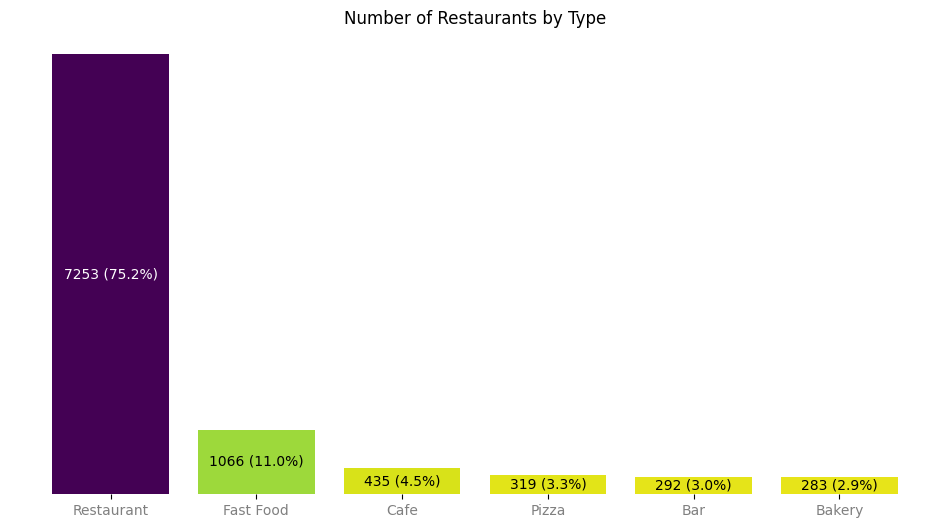

In [39]:
# Data
business_types = business_type_counts.index
counts = business_type_counts.values

# Uses the 'viridis' color palette with reverse color order
colors = viridis(1 - (counts / max(counts)))

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(business_types, counts, color=colors)

# Add value and percentage inside each bar
for bar, count, color, business_type in zip(bars, counts, colors, business_types):
    yval = bar.get_height()
    percentage = count / sum(counts) * 100
    text_color = 'white' if percentage > 50 else 'black'  # Choose a text color to contrast with the bar color
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{round(yval)} ({percentage:.1f}%)', ha='center', va='center', color=text_color)

    # Sets the text color on the x-axis to be the same as the bar color
    plt.gca().xaxis.get_ticklabels()[business_types.get_loc(business_type)].set_color('gray')

# Remove lines on the x and y axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Removes values on the y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Add labels and titles
plt.title('Number of Restaurants by Type')

# Displays a bar chart
plt.show()


**Conclusion:**

1. Number of Restaurants by Type:
- "Restaurant" type restaurants have the largest number, reaching 7253 (75.2%).
- Fast Food, Cafe, and Pizza are also quite numerous, with the respective numbers being 1066 (11.0%), 435 (4.5%), and 319 (3.3%).
- The number of Bar and Bakery type restaurants is slightly lower, with 292 (3.0%) and 283 (2.9%) respectively.
2. Percentage of Number of Restaurants:
- Most restaurants (including Restaurant, Fast Food, Cafe, Pizza) dominate in the composition of the total number of restaurants.
- The percentage of restaurants reaches more than 50%, indicating that this type of restaurant dominates in the dataset.
- The lowest percentage of Bakeries among other types of restaurants.
3. Color and Contrast:
- The colors on the bar chart use the 'viridis' color palette with reverse color order, providing an attractive visualization.
- The text inside each bar provides value and percentage information in contrasting colors for easy reading.
4. Aesthetic Adjustments:
- The x and y axis lines are removed to make the visualization clearer.
- Text on the x-axis (restaurant type) changed color to be uniform with bar color.

Overall, this bar chart provides a clear picture of the distribution of the number of restaurants by type, allowing readers to easily understand the comparison between restaurant types.

[Back to Table of Contents](#back)

<a id='step2.2'></a>
### 2.2 Examine the proportion of franchise-based and non-franchise businesses. Make the graph

Count the number of franchises and non-franchises

In [40]:
franchise_proportion = rest_df['franchise'].value_counts()

Displays the contents of `franchise proportion`

In [41]:
franchise_proportion

franchise
False    5972
True     3676
Name: count, dtype: int64

<a id='step2.2.1'></a>
#### 2.2.1 Graph of the proportion of franchise and non-franchise based businesses

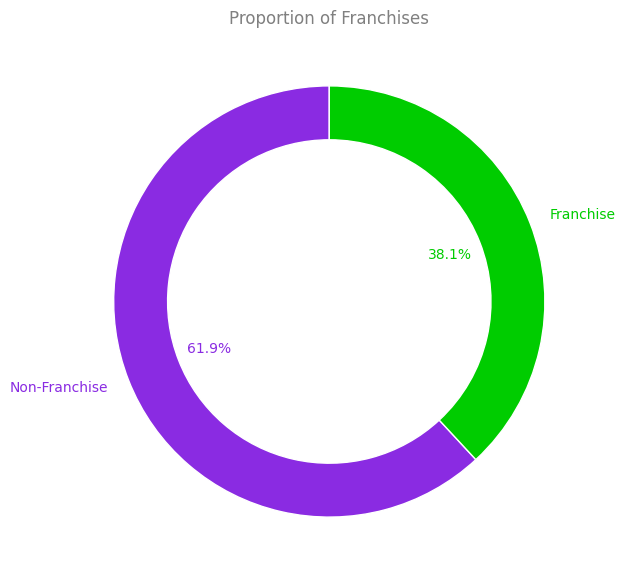

In [42]:
# Data
labels = ['Non-Franchise', 'Franchise']
sizes = franchise_proportion.values

# Choose a new color
colors = ['#8A2BE2', '#00CC00']  # Color examples: Dark purple and bright green

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.25, edgecolor='w'),
    labeldistance=1.1,
)

# Customize the text colors
for autotext, text_color in zip(autotexts, colors):
    autotext.set_color(text_color)

for text, text_color in zip(texts, colors):
    text.set_color(text_color)

# Customize the title color
plt.title('Proportion of Franchises', color='gray')

# Show the pie chart
plt.show()


**Conclusion:**

1. Proportion of Franchise vs. Non-Franchise:
- The number of non-franchises (False) is greater than the number of franchises (True).
- Non-franchise has a proportion of around 61.9%, while franchise is around 38.1%.
2. Color Visualization and Aesthetics:
- The colors chosen for the pie chart, namely dark purple for Non-Franchise and bright green for Franchise, provide good contrast.
- The use of different colors for each section makes it easier for readers to understand the comparison between Franchise and Non-Franchise.
3. Text Adjustment:
- The text inside the pie chart shows the percentage of each category, providing further information about the proportions of each.
4. Title Settings:
- The chart title ('Proportion of Franchises') is colored grey, providing additional aesthetics and separating the title from the main color of the chart.


Overall, this pie chart clearly displays the proportion between franchise and non-franchise restaurants, with aesthetic elements that provide an attractive and easy to understand visualization.

[Back to Table of Contents](#back)

<a id='step2.3'></a>
### 2.3 Which type of business is usually a franchise-based business?

<a id='step2.3.1'></a>
#### 2.3.1 Dataframe `franchise_df` 

Create a `franchise df` dataframe that only contains franchise data with the condition `[rest_df['franchise'] == True]`

In [43]:
franchise_df = rest_df[rest_df['franchise'] == True]

Displays the type of business of the franchise

In [44]:
franchise_df['business_type'].unique()

['Fast Food', 'Restaurant', 'Bakery', 'Bar', 'Pizza', 'Cafe']
Categories (6, object): ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']

Showing the many types of franchise businesses

In [45]:
franchise_df['business_type'].value_counts()

business_type
Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: count, dtype: int64

<a id='step2.3.2'></a>
#### 2.3.2 Dataframe `non_franchise_df` 

Create a `non_franchise_df` dataframe containing only Non-Franchise data with the condition `[rest_df['franchise'] == False]`

In [46]:
non_franchise_df = rest_df[rest_df['franchise'] == False]

Displays the type of business from Non-Franchise

In [47]:
non_franchise_df['business_type'].unique()

['Cafe', 'Restaurant', 'Fast Food', 'Bar', 'Pizza']
Categories (6, object): ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']

Shows many types of non-franchise businesses

In [48]:
non_franchise_df['business_type'].value_counts()

business_type
Restaurant    4961
Fast Food      461
Bar            215
Cafe           169
Pizza          166
Bakery           0
Name: count, dtype: int64

<a id='step2.3.3'></a>
#### 2.3.3 Bar Chart comparing Franchise and Non-Franchise

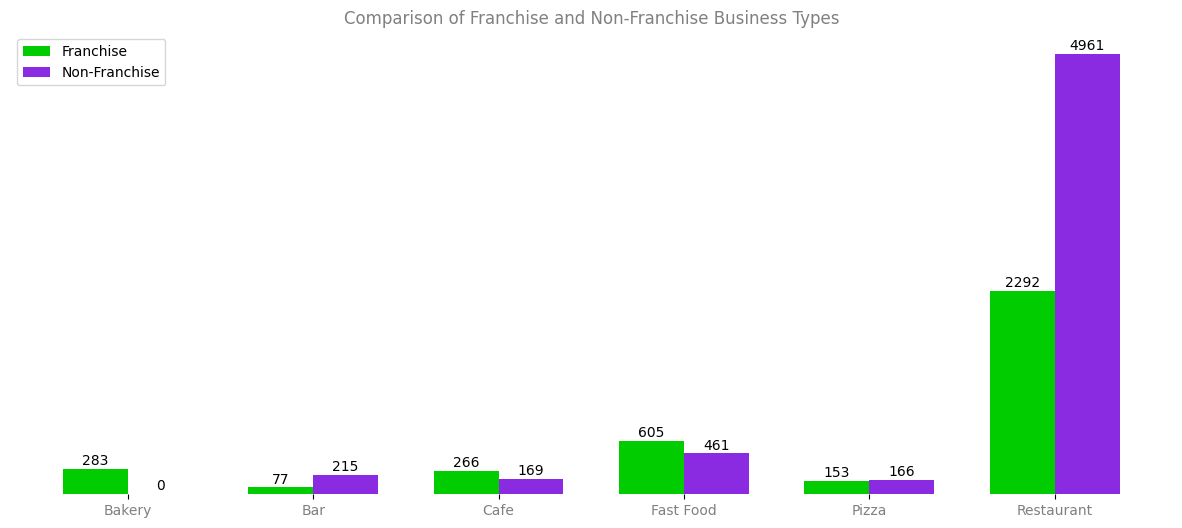

In [49]:
# Franchise Data
types_franchise = franchise_df['business_type'].value_counts().index
counts_franchise = franchise_df['business_type'].value_counts()

# Non-Franchise Data
types_non_franchise = non_franchise_df['business_type'].value_counts().index
counts_non_franchise = non_franchise_df['business_type'].value_counts()

# Combines Franchise and Non-Franchise data
types_combined = np.union1d(types_franchise, types_non_franchise)

# Set a consistent data order
counts_franchise = counts_franchise.reindex(types_combined, fill_value=0)
counts_non_franchise = counts_non_franchise.reindex(types_combined, fill_value=0)

# Create figures and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Determines the width of the bar
bar_width = 0.35

# Bar chart Franchise
bar_positions_franchise = np.arange(len(types_combined))
ax.bar(bar_positions_franchise, counts_franchise, color='#00CC00', width=bar_width, label='Franchise')

# Added value above each Franchise bar
for i, count in zip(bar_positions_franchise, counts_franchise):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

# Non-Franchise bar chart
bar_positions_non_franchise = bar_positions_franchise + bar_width
ax.bar(bar_positions_non_franchise, counts_non_franchise, color='#8A2BE2', width=bar_width, label='Non-Franchise')

# Add a value above each Non-Franchise bar
for i, count in zip(bar_positions_non_franchise, counts_non_franchise):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

# Add labels and titles
ax.set_title('Comparison of Franchise and Non-Franchise Business Types').set_color('gray')

# Added legend
ax.legend()

# Removes lines on the y-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Marks the x-axis tick position
ax.set_xticks(bar_positions_franchise + bar_width / 2)
ax.set_xticklabels(types_combined, color='gray', ha='center')

# Removes values on the y-axis
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Display graphics
plt.show()


<a id='step2.3.4'></a>
#### 2.3.4 Pie Chart comparing Franchise and Non-Franchise

Create a pivot table based on `business_type` and unique values in `business_name` along with `number_seats`

In [50]:
# Counts the number of unique business_names for each business_type and franchise
unique_counts = rest_df.groupby(['business_type', 'franchise'])['business_name'].nunique().reset_index(name='count')

# Create a pivot table
pivot_table = unique_counts.pivot_table(index='business_type', columns='franchise', values='count', aggfunc='sum', fill_value=0)

# Calculate the number of seats for each business_type and franchise
seat_counts = rest_df.groupby(['business_type', 'franchise'])['number_seats'].sum().reset_index(name='sum_seats')

# Create a pivot table
seat_pivot_table = seat_counts.pivot_table(index='business_type', columns='franchise', values='sum_seats', aggfunc='sum', fill_value=0)

# Added sum_seats_franchise and sum_seats_non_franchise columns
result = pd.DataFrame({
    'business_type': pivot_table.index,
    'len_unique_franchise': pivot_table[True],
    'len_unique_non_franchise': pivot_table[False],
    'sum_seats_franchise': seat_pivot_table[True],
    'sum_seats_non_franchise': seat_pivot_table[False]
}).reset_index(drop=True)

result


C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\742669533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_counts = rest_df.groupby(['business_type', 'franchise'])['business_name'].nunique().reset_index(name='count')
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\742669533.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seat_counts = rest_df.groupby(['business_type', 'franchise'])['number_seats'].sum().reset_index(name='sum_seats')


business_type  len_unique_franchise  len_unique_non_franchise  \
0        Bakery                   245                         0   
1           Bar                    61                       210   
2          Cafe                    46                       159   
3     Fast Food                   121                       402   
4         Pizza                    40                       149   
5    Restaurant                  1441                      4780   

   sum_seats_franchise  sum_seats_non_franchise  
0                 6162                        0  
1                 3100                     9972  
2                 6894                     3981  
3                23044                    10895  
4                 3906                     5200  
5               102810                   245688

Create a dataframe based on the pivot table above

In [51]:
data = {
    'business_type': ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'],
    'len_unique_franchise': [249, 61, 55, 144, 45, 1541],
    'len_unique_non_franchise': [0, 212, 161, 422, 160, 4835],
    'sum_seats_franchise': [6162, 3100, 6894, 23044, 3906, 102810],
    'sum_seats_non_franchise': [0, 9972, 3981, 10895, 5200, 245688]
}

result_df = pd.DataFrame(data)

result_df


business_type  len_unique_franchise  len_unique_non_franchise  \
0        Bakery                   249                         0   
1           Bar                    61                       212   
2          Cafe                    55                       161   
3     Fast Food                   144                       422   
4         Pizza                    45                       160   
5    Restaurant                  1541                      4835   

   sum_seats_franchise  sum_seats_non_franchise  
0                 6162                        0  
1                 3100                     9972  
2                 6894                     3981  
3                23044                    10895  
4                 3906                     5200  
5               102810                   245688

Calculates the franchise and non-franchise count for each `business_type`

In [52]:
# Counts the number of businesses (franchise=True) for each business_type
count_franchise = rest_df[rest_df['franchise'] == True].groupby('business_type').size().reset_index(name='count_franchise')

# Counts the number of businesses (franchise=False) for each business_type
count_non_franchise = rest_df[rest_df['franchise'] == False].groupby('business_type').size().reset_index(name='count_non_franchise')

# Create a pivot table to display the results
result = pd.merge(count_franchise, count_non_franchise, on='business_type', how='outer')

# Displays results
result


C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\3705412835.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_franchise = rest_df[rest_df['franchise'] == True].groupby('business_type').size().reset_index(name='count_franchise')
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\3705412835.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_non_franchise = rest_df[rest_df['franchise'] == False].groupby('business_type').size().reset_index(name='count_non_franchise')


business_type  count_franchise  count_non_franchise
0        Bakery              283                    0
1           Bar               77                  215
2          Cafe              266                  169
3     Fast Food              605                  461
4         Pizza              153                  166
5    Restaurant             2292                 4961

Create a dataframe based on the calculations above

In [53]:
# Data provided
data = {
    'business_type': ['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'],
    'count_franchise': [283, 77, 266, 605, 153, 2292],
    'count_non_franchise': [0, 215, 169, 461, 166, 4961]
}

# Create a DataFrame
result_count_df = pd.DataFrame(data)

# Displays DataFrame
result_count_df


business_type  count_franchise  count_non_franchise
0        Bakery              283                    0
1           Bar               77                  215
2          Cafe              266                  169
3     Fast Food              605                  461
4         Pizza              153                  166
5    Restaurant             2292                 4961

Combining two DataFrames based on 'business_type' column

In [54]:
merged_df = pd.merge(result_df, result_count_df, on='business_type')

# Displays the merged DataFrame
merged_df

business_type  len_unique_franchise  len_unique_non_franchise  \
0        Bakery                   249                         0   
1           Bar                    61                       212   
2          Cafe                    55                       161   
3     Fast Food                   144                       422   
4         Pizza                    45                       160   
5    Restaurant                  1541                      4835   

   sum_seats_franchise  sum_seats_non_franchise  count_franchise  \
0                 6162                        0              283   
1                 3100                     9972               77   
2                 6894                     3981              266   
3                23044                    10895              605   
4                 3906                     5200              153   
5               102810                   245688             2292   

   count_non_franchise  
0                    0  
1                  215  
2                  169  
3                  461  
4                  166  
5                 4961

Moved columns for easy analysis

In [55]:
merged_df.insert(merged_df.columns.get_loc('len_unique_franchise') + 1, 'count_franchise', merged_df.pop('count_franchise'))
merged_df.insert(merged_df.columns.get_loc('len_unique_non_franchise') + 1, 'count_non_franchise', merged_df.pop('count_non_franchise'))
merged_df.insert(merged_df.columns.get_loc('count_franchise') + 1, 'sum_seats_franchise', merged_df.pop('sum_seats_franchise'))

# Returns the resulting DataFrame
merged_df


business_type  len_unique_franchise  count_franchise  sum_seats_franchise  \
0        Bakery                   249              283                 6162   
1           Bar                    61               77                 3100   
2          Cafe                    55              266                 6894   
3     Fast Food                   144              605                23044   
4         Pizza                    45              153                 3906   
5    Restaurant                  1541             2292               102810   

   len_unique_non_franchise  count_non_franchise  sum_seats_non_franchise  
0                         0                    0                        0  
1                       212                  215                     9972  
2                       161                  169                     3981  
3                       422                  461                    10895  
4                       160                  166                     5200  
5                      4835                 4961                   245688

Added `number_branches` and `mean_seats` columns

In [56]:
merged_df['number_branches_franchise'] = merged_df['count_franchise'] / merged_df['len_unique_franchise']
merged_df['number_branches_non_franchise'] = merged_df['count_non_franchise'] / merged_df['len_unique_non_franchise']
merged_df['mean_seats_franchise'] = merged_df['sum_seats_franchise'] / merged_df['len_unique_franchise']
merged_df['mean_seats_non_franchise'] = merged_df['sum_seats_non_franchise'] / merged_df['len_unique_non_franchise']

# replace nan with 0
merged_df=merged_df.fillna(0)

# Returns the resulting DataFrame
merged_df

business_type  len_unique_franchise  count_franchise  sum_seats_franchise  \
0        Bakery                   249              283                 6162   
1           Bar                    61               77                 3100   
2          Cafe                    55              266                 6894   
3     Fast Food                   144              605                23044   
4         Pizza                    45              153                 3906   
5    Restaurant                  1541             2292               102810   

   len_unique_non_franchise  count_non_franchise  sum_seats_non_franchise  \
0                         0                    0                        0   
1                       212                  215                     9972   
2                       161                  169                     3981   
3                       422                  461                    10895   
4                       160                  166                     5200   
5                      4835                 4961                   245688   

   number_branches_franchise  number_branches_non_franchise  \
0                   1.136546                       0.000000   
1                   1.262295                       1.014151   
2                   4.836364                       1.049689   
3                   4.201389                       1.092417   
4                   3.400000                       1.037500   
5                   1.487346                       1.026060   

   mean_seats_franchise  mean_seats_non_franchise  
0             24.746988                  0.000000  
1             50.819672                 47.037736  
2            125.345455                 24.726708  
3            160.027778                 25.817536  
4             86.800000                 32.500000  
5             66.716418                 50.814478

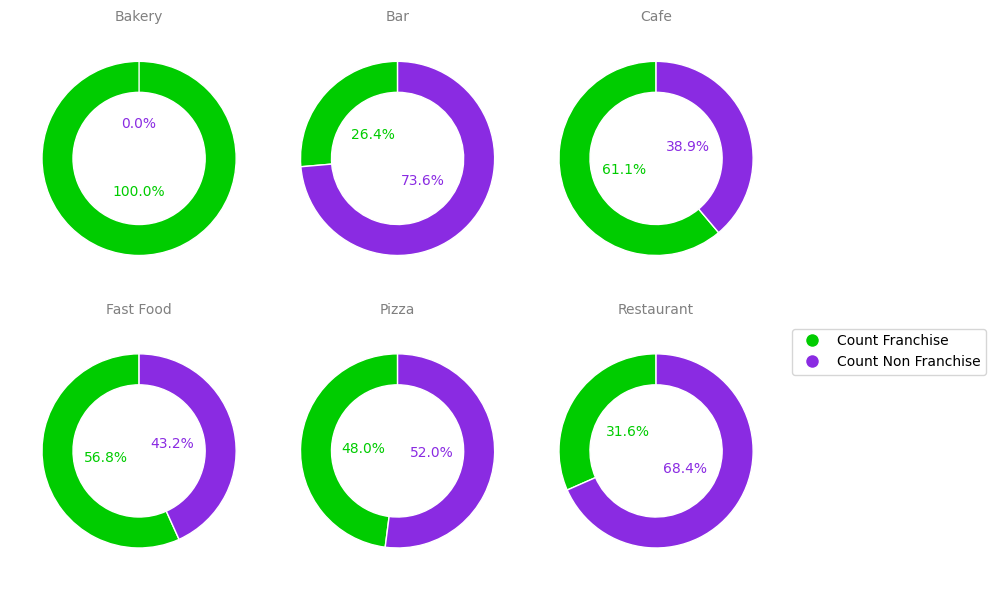

In [57]:
# Assuming merged_df is your DataFrame
business_types = merged_df['business_type']

# Membuat pie chart untuk setiap jenis usaha
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Collect all autopct labels
all_autotexts = []
all_autotexts_count = []  # Initialize the list for count autopct labels

# Looping untuk setiap jenis usaha
for i, business_type in enumerate(business_types):
    # Ekstrak data untuk jenis usaha saat ini
    count_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'count_franchise'].values[0]
    count_non_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'count_non_franchise'].values[0]
    
     # Plotting outer pie chart for count with different colors and radius
    count_colors = ['#00CC00', '#8A2BE2']
    wedges, texts, autotexts = axes[i // 3, i % 3].pie([count_franchise, count_non_franchise], autopct='%1.1f%%', pctdistance=0.35,                                                       
                                                       startangle=90, colors=count_colors, wedgeprops=dict(width=0.3, edgecolor='w'),
                                                       textprops=dict(color='white', weight=550.7), radius=0.94)

    # Collect the autopct labels for count
    all_autotexts_count.extend(autotexts)

    # Drawing a thicker white circle in the center to create a donut chart for count
    centre_circle = plt.Circle((0, 0), 0.3, fc='white', lw=2.5)
    axes[i // 3, i % 3].add_artist(centre_circle)

    axes[i // 3, i % 3].set_title(business_type, size=10, color='gray')

# Customize the text colors for all autopct labels (count)
for autotext, text_color in zip(all_autotexts_count, [count_colors[0], count_colors[1]] * (len(all_autotexts_count)//2)):
    autotext.set_color(text_color)

# Added a legend for the colors on the pie chart
count_legend_labels = ['Count Franchise', 'Count Non Franchise']

count_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=count_colors[0], markersize=10, label=count_legend_labels[0])
count_legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=count_colors[1], markersize=10, label=count_legend_labels[1])

plt.legend(handles=[count_legend, count_legend2], bbox_to_anchor=(1, 1))

# Displays a pie chart
plt.tight_layout()
plt.show()


**Answer**

Based on the comparison graph of types of franchise and non-franchise businesses that you have presented, it can be concluded that the types of businesses that are usually franchise-based businesses are "Fast Food" and "Restaurant." This can be seen from the highest number of franchises for these two types of business. Here are the main takeaways:

1. Franchise (Franchise):
- The highest number of franchises is in the "Restaurant" business type with 2292 franchises followed by "Fast Food" with 605 franchises.
- "Bakery," "Cafe," "Pizza," and "Bar" business types also have representation in franchising, although the numbers are lower compared to "Restaurant" and "Fast Food."
2. Non-Franchise (Non-Franchise):
- The highest number of non-franchises is also in the "Restaurant" type of business with 4961 non-franchisees, followed by "Fast Food" with 461 non-franchisees.
- The business types "Bar," "Cafe," and "Pizza," are also present in non-franchises, and in this case, "Bakery" has no representation in non-franchises.
3. Overall Comparison:
- Bar charts and pie charts provide a clear view of the comparison of the number and proportion of franchise and non-franchise business types.
- "Restaurant" and "Fast Food" dominate both franchise and non-franchise numbers.

Thus, when considering franchise-based businesses, focusing on "Fast Food" and "Restaurant" types of businesses may be more common and have a high success rate.

[Back to Table of Contents](#back)

<a id='step2.4'></a>
### 2.4 Which are the characteristics of a franchise-based type of business: having many places with a small number of seats or having several places with a large number of seats?

Create a boxplot to determine the distribution of the number of seats for franchises and non-franchises

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\2389062647.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Franchise', y='number_seats', data=combined_df, palette=colors)


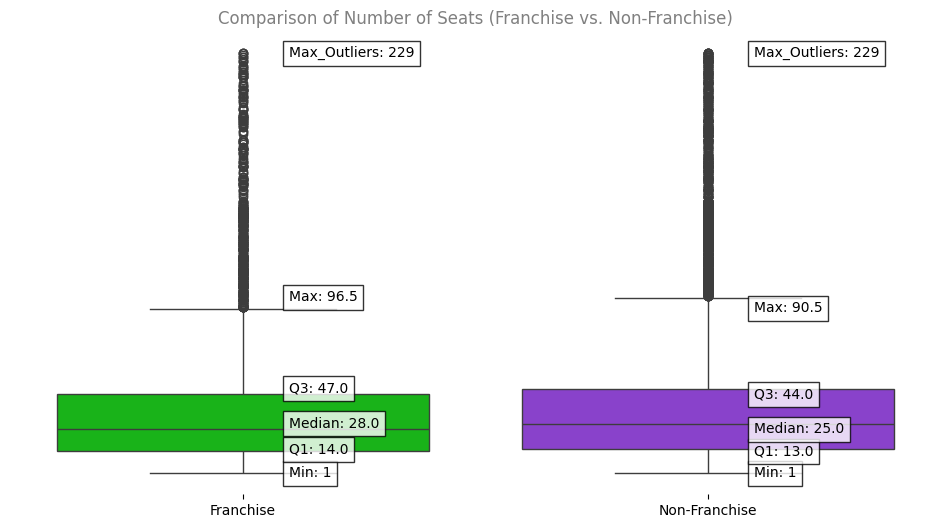

In [58]:
# Assuming franchise_df and non_franchise_df are your DataFrames
combined_df = pd.concat([franchise_df.assign(Franchise='Franchise'), non_franchise_df.assign(Franchise='Non-Franchise')])

plt.figure(figsize=(12, 6))

# Define colors
colors = {'Franchise': '#00CC00', 'Non-Franchise': '#8A2BE2'}

# Boxplot with additional summary statistics
ax = sns.boxplot(x='Franchise', y='number_seats', data=combined_df, palette=colors)

# Add text annotations for summary statistics
for franchise_type in ['Franchise', 'Non-Franchise']:
    subset_data = combined_df[combined_df['Franchise'] == franchise_type]['number_seats']
    q1, median, q3 = subset_data.quantile([0.25, 0.5, 0.75])
    mean = subset_data.mean()
    minimum = subset_data.min()
    maximum = q3 + 1.5 * (q3 - q1)
    maximum_outliers = subset_data.max()

    # Calculate positions for annotations
    x_pos = (franchise_type == 'Franchise') + 0.1  # Adjust x-position for 'No' category
    y_pos = [minimum, q1, median, q3, maximum, maximum_outliers]

    # Add text annotations
    for label, y_val in zip(['Min', 'Q1', 'Median', 'Q3', 'Max', 'Max_Outliers'], y_pos):
        ax.text(
            x=x_pos,
            y=y_val,
            s=f'{label}: {y_val}',
            ha='left',
            va='center',
            bbox=dict(facecolor='white', alpha=0.8),
        )

# Hide x and y axis grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Hide x and y axis ticks and tick labels
ax.set_yticks([])
ax.set_yticklabels([])

# Remove box around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Hide axis labels
ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Comparison of Number of Seats (Franchise vs. Non-Franchise)', color='gray')
plt.show()


Displays the distribution of `number_seats` data on `franchise_df` franchises

In [59]:
franchise_df.sort_values(by='number_seats').describe()

id  number_seats
count   3676.000000   3676.000000
mean   16626.003808     39.694233
std     2747.437824     43.437212
min    11794.000000      1.000000
25%    14281.500000     13.000000
50%    16624.500000     25.000000
75%    19015.500000     44.000000
max    21436.000000    229.000000

Displays the distribution of `number_seats` data on non-franchise `non_franchise_df`

In [60]:
non_franchise_df.sort_values(by='number_seats').describe()

id  number_seats
count   5972.000000   5972.000000
mean   16600.240121     46.171467
std     2809.736870     49.875746
min    11786.000000      1.000000
25%    14158.750000     14.000000
50%    16598.500000     28.000000
75%    19026.250000     47.000000
max    21435.000000    229.000000

**Conclusion**

1. franchise_df:
- Number of observations (count): 3676
- Average number of seats: 39.694233
- Standard deviation of the number of seats: 43.437212
- Minimum number of seats: 1
- 25th percentile: 13 seats
- Median (50th percentile): 25 seats
- 75th percentile: 44 seats
- Maximum number of seats: 229
2. non_franchise_df:
- Number of observations (count): 5972
- Average number of seats: 46.171467
- Standard deviation of the number of seats: 49.875746
- Minimum number of seats: 1
- 25th percentile: 14 seats
- Median (50th percentile): 28 seats
- 75th percentile: 47 seats
- Maximum number of seats: 229



On average, non-franchise establishments had slightly more seats (46.17) than franchise establishments (39.69).
The standard deviation for non-franchise establishments is also higher, indicating greater variation in the number of seats.
Both franchised and non-franchised establishments have similar minimum (1 seat) and maximum (229 seats) value ranges.
The median (50th percentile) for non-franchise establishments is higher than for franchise establishments, indicating a higher central tendency in the number of seats for non-franchise establishments.
The interquartile range (IQR) for both datasets shows the middle 50% of the data, with non-franchise establishments generally having a wider IQR.


Overall, non-franchise business premises are not much different from franchise business premises

Create a donut chart to analyze

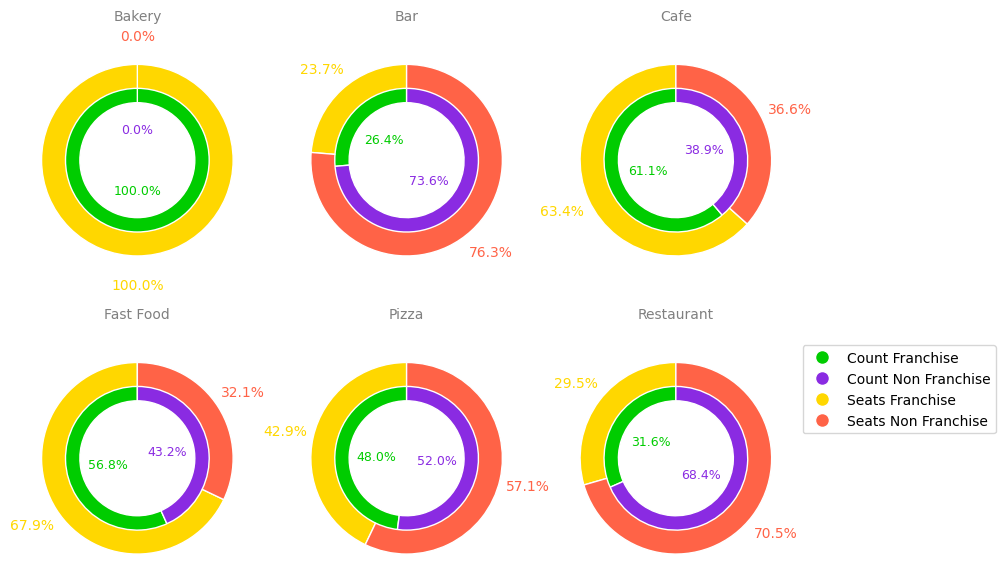

In [61]:
# Assuming merged_df is your DataFrame
business_types = merged_df['business_type']

# Membuat pie chart untuk setiap jenis usaha
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Collect all autopct labels
all_autotexts = []
all_autotexts_count = []  # Initialize the list for count autopct labels
all_autotexts_seats = []  # Initialize the list for seats autopct labels


# Looping untuk setiap jenis usaha
for i, business_type in enumerate(business_types):
    # Ekstrak data untuk jenis usaha saat ini
    count_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'count_franchise'].values[0]
    count_non_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'count_non_franchise'].values[0]
    sum_seats_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'sum_seats_franchise'].values[0]
    sum_seats_non_franchise = merged_df.loc[merged_df['business_type'] == business_type, 'sum_seats_non_franchise'].values[0]

    # Plotting outer pie chart for count with different colors and radius
    count_colors = ['#00CC00', '#8A2BE2']
    wedges, texts, autotexts = axes[i // 3, i % 3].pie([count_franchise, count_non_franchise], autopct='%1.1f%%', pctdistance=0.35, 
                                                       startangle=90, colors=count_colors, wedgeprops=dict(width=0.3, edgecolor='w'), 
                                                       textprops=dict(color='white', weight=550.7, size=9), radius=0.9)

    # Collect the autopct labels for count
    all_autotexts_count.extend(autotexts)

    # Drawing a thicker white circle in the center to create a donut chart for count
    centre_circle = plt.Circle((0, 0), 0.3, fc='white', lw=2.5)
    axes[i // 3, i % 3].add_artist(centre_circle)

    # Plotting inner pie chart for sum of seats with different colors and larger radius
    seats_colors = ['#FFD700', '#FF6347']
    wedges_seats, texts_seats, autotexts_seats = axes[i // 3, i % 3].pie([sum_seats_franchise, sum_seats_non_franchise], 
                                                                        autopct='%1.1f%%', pctdistance=1.3, 
                                                                        startangle=90, colors=seats_colors, 
                                                                        wedgeprops=dict(width=0.25, edgecolor='w'), 
                                                                        textprops=dict(color='white', weight=550.7, size=10), radius=1)

    # Collect the autopct labels for seats
    all_autotexts_seats.extend(autotexts_seats)
    
    axes[i // 3, i % 3].set_title(business_type, y=1.05, size=10, color='gray')

# Customize the text colors for all autopct labels (count)
for autotext, text_color in zip(all_autotexts_count, [count_colors[0], count_colors[1]] * (len(all_autotexts_count)//2)):
    autotext.set_color(text_color)

# Customize the text colors for all autopct labels (seats)
for autotext, text_color in zip(all_autotexts_seats, [seats_colors[0], seats_colors[1]] * (len(all_autotexts_seats)//2)):
    autotext.set_color(text_color)

# Added a legend for the colors on the pie chart
count_legend_labels = ['Count Franchise', 'Count Non Franchise']
seats_legend_labels = ['Seats Franchise', 'Seats Non Franchise']

count_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=count_colors[0], markersize=10, label=count_legend_labels[0])
count_legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=count_colors[1], markersize=10, label=count_legend_labels[1])
seats_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=seats_colors[0], markersize=10, label=seats_legend_labels[0])
seats_legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=seats_colors[1], markersize=10, label=seats_legend_labels[1])

plt.legend(handles=[count_legend, count_legend2, seats_legend, seats_legend2], bbox_to_anchor=(1, 1))

# Displays a pie chart
plt.tight_layout()
plt.show()


**Conclusion**

1. Restaurants:
- The number of non-franchise restaurants is greater than franchised (68.4% vs. 31.6%).
- The total number of seats in non-franchise restaurants is also higher compared to franchises (70.4% vs 29.6%).
2. Fast Food:
- The number of fast food franchises dominates the number of non-franchisees (56.8% vs. 43.2%).
- The total number of seats in fast food franchises also dominates the number of non-franchisees (67.9% vs. 32.1%).
3. Bakery:
- All bakery businesses are franchises, there are no non-franchise businesses in this category.
4. Café:
- The number of cafe franchises dominates the number of non-franchisees (61.2% vs. 38.8%).
- The total number of seats in franchise cafes also dominates the number of non-franchisees (63.3% vs. 36.7%).
5. Pizzas:
- The number of non-franchise pizza companies dominates the number of franchises (52.0% vs 48.0%).
- The total number of seats at non-franchise pizzerias also dominates the franchise number (57.1% vs. 42.9%).
6. Bars:
- The number of bar franchises is less than non-franchises (26.4% vs. 73.6%).
- The total number of seats in franchise bars is also less than non-franchise (23.7% vs. 76.3%).

Make comparison calculations on `merged_df`

In [62]:
# Add columns comparison_unique
merged_df['comparison_unique'] = np.where(
    merged_df['len_unique_franchise'] < merged_df['len_unique_non_franchise'],
    'smaller', 'bigger'
)

# Add columns comparison_branches
merged_df['comparison_branches'] = np.where(
    merged_df['number_branches_franchise'] < merged_df['number_branches_non_franchise'],
    'smaller', 'bigger'
)

# Add columns comparison_seats
merged_df['comparison_seats'] = np.where(
    merged_df['mean_seats_franchise'] < merged_df['mean_seats_non_franchise'],
    'smaller', 'bigger'
)

merged_df.insert(merged_df.columns.get_loc('business_type') + 1, 'comparison_unique', merged_df.pop('comparison_unique'))
merged_df.insert(merged_df.columns.get_loc('comparison_unique') + 1, 'comparison_branches', merged_df.pop('comparison_branches'))
merged_df.insert(merged_df.columns.get_loc('comparison_branches') + 1, 'comparison_seats', merged_df.pop('comparison_seats'))

# Returns the merged_df DataFrame
merged_df


business_type comparison_unique comparison_branches comparison_seats  \
0        Bakery            bigger              bigger           bigger   
1           Bar           smaller              bigger           bigger   
2          Cafe           smaller              bigger           bigger   
3     Fast Food           smaller              bigger           bigger   
4         Pizza           smaller              bigger           bigger   
5    Restaurant           smaller              bigger           bigger   

   len_unique_franchise  count_franchise  sum_seats_franchise  \
0                   249              283                 6162   
1                    61               77                 3100   
2                    55              266                 6894   
3                   144              605                23044   
4                    45              153                 3906   
5                  1541             2292               102810   

   len_unique_non_franchise  count_non_franchise  sum_seats_non_franchise  \
0                         0                    0                        0   
1                       212                  215                     9972   
2                       161                  169                     3981   
3                       422                  461                    10895   
4                       160                  166                     5200   
5                      4835                 4961                   245688   

   number_branches_franchise  number_branches_non_franchise  \
0                   1.136546                       0.000000   
1                   1.262295                       1.014151   
2                   4.836364                       1.049689   
3                   4.201389                       1.092417   
4                   3.400000                       1.037500   
5                   1.487346                       1.026060   

   mean_seats_franchise  mean_seats_non_franchise  
0             24.746988                  0.000000  
1             50.819672                 47.037736  
2            125.345455                 24.726708  
3            160.027778                 25.817536  
4             86.800000                 32.500000  
5             66.716418                 50.814478

Based on the data presented in the `merged_df` DataFrame and the results of the comparison between franchise-based and non-franchise-based businesses in the columns that have been added, we can make several conclusions regarding the characteristics of this type of franchise-based business :

1. Unique Items (comparison_unique):
In general, franchise-based businesses have fewer unique items compared to non-franchise businesses.
In this case, for all types of businesses, franchises tend to have a smaller number of unique items.

2. Branches (comparison_brances):
Franchises generally have a greater number of branches than non-franchise businesses.
This conclusion is based on a comparison of the number of branches (number_branches) between the two types of business.

3. Seats (comparison_seats):
In general, franchises tend to have a greater number of seats in each branch compared to non-franchise businesses.
This can be seen from the comparison of mean_seats between the two

**Answer**
<br>Which are the characteristics of a franchise-based type of business: having many places with a small number of seats or having several places with a large number of seats?
<br>The answer is that franchise-based businesses tend to have a larger presence with more branches and more seats in each branch.


On the other hand, non-franchise businesses tend to have more unique items, but the number of branches and seats in each branch is relatively smaller.
Thus, it can be said that the main characteristics of this type of franchise-based business are scalability in terms of the number of branches and larger seat capacity in each branch. In contrast, non-franchise businesses tend to focus more on product variations or unique items, albeit on a smaller scale.

[Back to Table of Contents](#back)

<a id='step2.5'></a>
### 2.5 Determine the average number of seats for each type of business. On average, which type of business has the largest number of seats? Make the graph

Determine the average number of seats for each type of business

In [63]:
average_seats_by_type = rest_df.groupby('business_type')['number_seats'].mean().sort_values(ascending=False)

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\27342530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_seats_by_type = rest_df.groupby('business_type')['number_seats'].mean().sort_values(ascending=False)


Create graphs

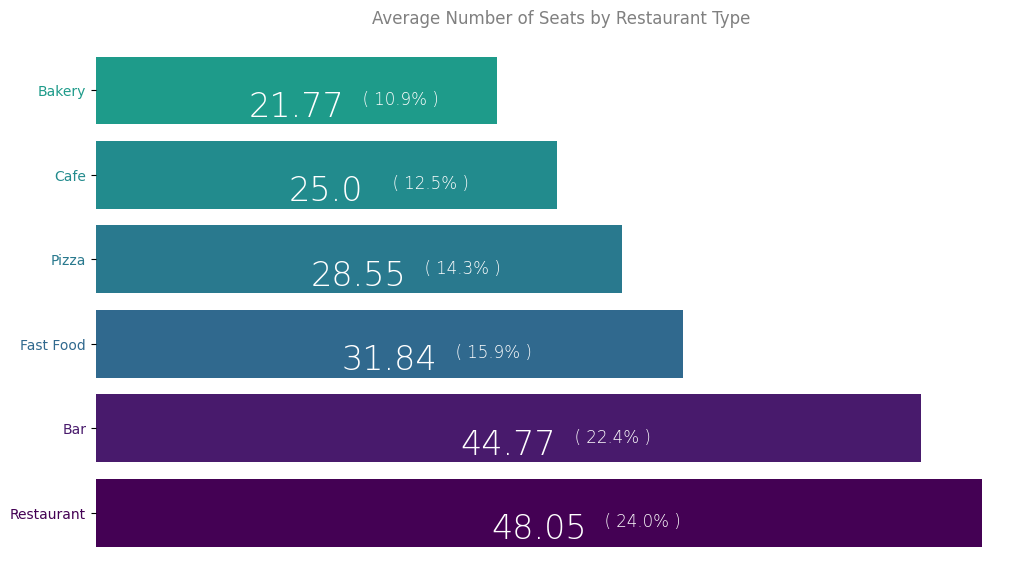

In [64]:
# Using the 'viridis' color palette with reverse color order
colors = viridis(1 - average_seats_by_type / max(average_seats_by_type))  # Reverse color order

# Create a horizontal bar chart
plt.figure(figsize=(12, 7))
bars = plt.barh(average_seats_by_type.index, average_seats_by_type, color=colors)

# Adds values and percentages inside each bar
for bar, count, color, business_type in zip(bars, average_seats_by_type, colors, average_seats_by_type.index):
    xval = bar.get_width()
    percentage = count / sum(average_seats_by_type) * 100

    text_color = 'white' if percentage > 50 else 'black'  # Choose the text color to contrast with the bar color
    # Percentage text
    plt.text(xval / 2, bar.get_y() + bar.get_height() / 2, f'{round(xval, 2)}', ha='center', va='top', color='white', 
             fontsize=24, fontweight=200)

    # Rating text
    plt.text(xval / 2 + 3, bar.get_y() + bar.get_height() / 2, f'  ( {percentage:.1f}% )', ha='left', va='top', 
             color='white', fontsize=12, fontweight=200)

    # Sets the text color on the y-axis to be the same as the bar color
    plt.gca().yaxis.get_ticklabels()[list(average_seats_by_type.index).index(business_type)].set_color(color)

# Remove lines on the x and y axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Removes values on the x-axis
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Add title
plt.title('Average Number of Seats by Restaurant Type', color='gray')

# Displays a horizontal bar chart
plt.show()


Displays the contents of `average_seats_by_type`

In [65]:
average_seats_by_type

business_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number_seats, dtype: float64

**Conclusion**
1. Restaurants have the highest average number of seats, with approximately 48.05(24.0%) seats per restaurant. This shows that restaurants generally have a larger capacity compared to other types of restaurants in the data.

2. Bars have the second highest average number of seats, namely around 45.77(22.4%) seats per bar. Although not as many as restaurants, bars have significant seating capacity.

3. Fast Food and Pizza have a lower average number of seats, with around 31.84(15.9%) seats and 28.55(14.3%) seats respectively. This suggests that this type of restaurant may focus more on delivery services or fast food concepts.

4. Cafes have an average number of seats of around 25(12.5%) seats, indicating that cafes tend to have a smaller seating capacity compared to restaurants, bars and other types of restaurants.

5. Bakery has the lowest average number of seats, namely around 21.77(10.9%) seats. This can mean that the bakery is more focused on selling bread and cake products to take home rather than providing seating for eating on the spot.

This graph provides a visual understanding of the distribution of the average number of seats for each type of restaurant in the dataset

**Answer**
<br>On average, the type of business that has the largest number of seats is "Restaurant" with an average of around 48.05 seats

[Back to Table of Contents](#back)

<a id='step2.6'></a>
### 2.6 Move the street name data from the address column to a separate column

Make a copy of the 'address' column and name it 'address_copy' using the copy() method of pandas

In [66]:
rest_df['address_copy'] = rest_df['address'].copy()

Make all text in the 'address_copy' column uppercase using the str.upper() method in pandas

In [67]:
rest_df['address_copy'] = rest_df['address_copy'].str.upper()

Returns `address` and `address_copy`

In [68]:
rest_df[['address', 'address_copy']]

address                 address_copy
0          3708 N EAGLE ROCK BLVD       3708 N EAGLE ROCK BLVD
1             100 WORLD WAY # 120          100 WORLD WAY # 120
2       6801 HOLLYWOOD BLVD # 253    6801 HOLLYWOOD BLVD # 253
3              1814 W SUNSET BLVD           1814 W SUNSET BLVD
4              2100 ECHO PARK AVE           2100 ECHO PARK AVE
...                           ...                          ...
9646             217 W TEMPLE AVE             217 W TEMPLE AVE
9647             5750 MELROSE AVE             5750 MELROSE AVE
9648          6741 HOLLYWOOD BLVD          6741 HOLLYWOOD BLVD
9649      548 S SPRING ST STE 100      548 S SPRING ST STE 100
9650  1300 S SAN PEDRO ST STE 111  1300 S SAN PEDRO ST STE 111

[9648 rows x 2 columns]

Counts the number of unique `address_copy` values

In [69]:
len(rest_df['address_copy'].unique())

8510

Changing 'N' to 'NNNN', 'W' to 'WWWW', 'E' to 'EEEE', 'S' to 'SSSS'

In [70]:
rest_df['address_copy'] = rest_df['address_copy'].str.replace(' N ', ' NNNN ')
rest_df['address_copy'] = rest_df['address_copy'].str.replace(' W ', ' WWWW ')
rest_df['address_copy'] = rest_df['address_copy'].str.replace(' E ', ' EEEE ')
rest_df['address_copy'] = rest_df['address_copy'].str.replace(' S ', ' SSSS ')

Returns `address` and `address_copy`

In [71]:
rest_df[['address', 'address_copy']]

address                    address_copy
0          3708 N EAGLE ROCK BLVD       3708 NNNN EAGLE ROCK BLVD
1             100 WORLD WAY # 120             100 WORLD WAY # 120
2       6801 HOLLYWOOD BLVD # 253       6801 HOLLYWOOD BLVD # 253
3              1814 W SUNSET BLVD           1814 WWWW SUNSET BLVD
4              2100 ECHO PARK AVE              2100 ECHO PARK AVE
...                           ...                             ...
9646             217 W TEMPLE AVE             217 WWWW TEMPLE AVE
9647             5750 MELROSE AVE                5750 MELROSE AVE
9648          6741 HOLLYWOOD BLVD             6741 HOLLYWOOD BLVD
9649      548 S SPRING ST STE 100      548 SSSS SPRING ST STE 100
9650  1300 S SAN PEDRO ST STE 111  1300 SSSS SAN PEDRO ST STE 111

[9648 rows x 2 columns]

Replaced several characters in `address_copy` to make analysis easier

In [72]:
def replace_if_contains(substring, replacement, column='address_copy'):
    rest_df.loc[rest_df[column].str.contains(substring, case=False, na=False), column] = replacement

replace_if_contains('JAPANE', 'JAPANESE VLG PLZ') 
replace_if_contains('ASTRONAU', 'ELLISON ONIZUKA ST')
replace_if_contains('ONIZUK', 'ELLISON ONIZUKA ST')
replace_if_contains('BROAD', 'BROADWAY')
replace_if_contains('MARTIN', 'MARTIN LUTHER KING JR BLVD')
replace_if_contains('MLKJ', 'MARTIN LUTHER KING JR BLVD')
replace_if_contains('MLK', 'MARTIN LUTHER KING JR BLVD')
replace_if_contains('Z00', 'ZOO DR')
replace_if_contains(' CHAVEZ', 'CESAR E CHAVEZ AVE')
replace_if_contains('PLEASANT AVE', 'PPPLEASANT AVE')
replace_if_contains(' CALIFORNIA', 'CALIFORNIA SSSTATE ROUTE 2 BLVD')
replace_if_contains(' STOCKER', 'SSSTOCKER ST')
replace_if_contains('STA MON BLVD', 'SSSTA MON BLVD')
replace_if_contains(' ANDREW', 'SSST ANDREWS')
replace_if_contains(' STONE', 'SSSTONE CANYON RD')
replace_if_contains(' VINCENT', 'SSST VINCENT CT')
replace_if_contains(' UNIVERSITY', 'SSSTATE UNIVERSITY DR')
replace_if_contains(' STANLEY AVE', 'SSSTANLEY AVE')
replace_if_contains(' STATE ST', 'SSSTATE ST')
replace_if_contains(' STATE DR', 'SSSTATE DR')
replace_if_contains('541 S SPRING', 'SPRING ST')
replace_if_contains('KINNEY', 'ABBOT KINNEY BLVD')
replace_if_contains('ALAMEDA', 'ALAMEDA ST')
replace_if_contains('ALF', 'ALFRED ST')
replace_if_contains(' STARS', 'BBBVENUE OF THE SSSTARS')
replace_if_contains('AVENUE', 'AAAVENUE')
replace_if_contains('BEVERW', 'BEVERLY DR')
replace_if_contains('CENTINE', 'CENTINELA AVE')
replace_if_contains('EVERGREEN', 'EVERGREEN AVE')
replace_if_contains('LA CIEN', 'LA CIENEGA BLVD')
replace_if_contains('LAWRENCE', 'LAWRENCE ST')
replace_if_contains('LOS ANGELE', 'LOS ANGELES ST')
replace_if_contains('MILLEN', 'MILLENNIUM DR')
replace_if_contains('OLYMP', 'OLYMPIC BLVD')
replace_if_contains('ROSCOM', 'ROSCOMARE RD')
replace_if_contains('SAWT', 'SAWTELLE BLVD')
replace_if_contains('SILVER', 'SILVER LAKE BLVD')
replace_if_contains('STANFORD', 'SSSTANFORD AVE')
replace_if_contains('WATT', 'WATT WAY')

Changing characters to make the analysis process easier

In [73]:
rest_df['address_copy'] = rest_df['address_copy'].str.replace("BLV", "BLVD", regex=False)
rest_df['address_copy'] = rest_df['address_copy'].str.replace("'S", "S", regex=False)

Removes characters to the right based on 'keywords'

In [74]:
# List of keywords whose right characters you want to delete
keywords = [' BLVD', ' AVE', ' WAY', ' ST', ' RD', ' AVENUE' , ' HWY', ' DR', 'BROADWAY', ' PL', 'CENTURY PARK', ' PLZ', ' STS', ' CT']

# Iterate through keywords and delete the characters to the right of them
for keyword in keywords:
    rest_df['address_copy'] = rest_df['address_copy'].apply(lambda x: remove_after_keyword(x, keyword))

Deletes characters to the left based on 'keywords'

In [75]:
def remove_before_keyword(text, keyword):
    pattern = re.compile(fr'^.*?{re.escape(keyword)}(.*)$', flags=re.IGNORECASE)
    match = re.search(pattern, text)
    if match:
        return match.group(1)
    return text

# List of keywords whose left characters you want to delete
keywords = ['NNNN', 'WWWW', 'EEEE', 'SSSS']

# Iterate through keywords and delete characters to the left of them
for keyword in keywords:
    rest_df['address_copy'] = rest_df['address_copy'].apply(lambda x: remove_before_keyword(x, keyword))

Returns `address` and `address_copy` after engineering

In [76]:
rest_df[['address', 'address_copy']]

address         address_copy
0          3708 N EAGLE ROCK BLVD      EAGLE ROCK BLVD
1             100 WORLD WAY # 120        100 WORLD WAY
2       6801 HOLLYWOOD BLVD # 253  6801 HOLLYWOOD BLVD
3              1814 W SUNSET BLVD          SUNSET BLVD
4              2100 ECHO PARK AVE   2100 ECHO PARK AVE
...                           ...                  ...
9646             217 W TEMPLE AVE           TEMPLE AVE
9647             5750 MELROSE AVE     5750 MELROSE AVE
9648          6741 HOLLYWOOD BLVD  6741 HOLLYWOOD BLVD
9649      548 S SPRING ST STE 100            SPRING ST
9650  1300 S SAN PEDRO ST STE 111         SAN PEDRO ST

[9648 rows x 2 columns]

Create a function to remove numbers unless they are followed by 'TH', 'ND', 'RD', or 'TH' and insert them into the `street_name` column

In [77]:
# Function to delete numbers
def remove_numbers_except_suffix(text):
    # Use regular expressions to remove numbers, unless they are followed by 'st', 'nd', 'rd', or 'th'
    return re.sub(r'\b(\d+)(?!(ST|ND|RD|TH)\b)', '', text)

# Applying the function to the 'street_name' column
rest_df['street_name'] = rest_df['address_copy'].apply(remove_numbers_except_suffix)

Displays only those containing two digits followed by 'TH' inside 'address_copy'

In [78]:
rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}TH\b')]

id                         business_name                address  \
116   11902                          TUTTI FRUTTI          312 E 11TH ST   
164   11950                   PUPUSERIA CUSCATLAN          608 E 59TH ST   
194   11980                       THE RAMEN JOINT         6220 W 87TH ST   
491   12277                  FIRST STREET CUISINE         2200 E 15TH ST   
834   12620                    WESTCHESTER BAKERY         6216 W 87TH ST   
...     ...                                   ...                    ...   
9210  20996                                   THE         1907 W 48TH ST   
9213  20999  THE COFFEE BEAN AND TEA LEAF STORAGE          900 W 34TH ST   
9327  21113                          IT BOBA TIME          623 E 12TH ST   
9400  21186                           MYSTERY BOX         1720 E 16TH ST   
9506  21292                            ANZIO CAFE  807 E 12TH ST STE 249   

      franchise business_type  number_seats address_copy street_name  
116        True    Restaurant             9      11TH ST      1TH ST  
164       False    Restaurant             4      59TH ST      9TH ST  
194       False    Restaurant            11      87TH ST      7TH ST  
491       False    Restaurant            44      15TH ST      5TH ST  
834        True        Bakery             7      87TH ST      7TH ST  
...         ...           ...           ...          ...         ...  
9210       True    Restaurant            39      48TH ST      8TH ST  
9213       True          Cafe             7      34TH ST      4TH ST  
9327       True    Restaurant            28      12TH ST      2TH ST  
9400      False    Restaurant            71      16TH ST      6TH ST  
9506      False    Restaurant            37      12TH ST      2TH ST  

[79 rows x 8 columns]

Fixed `street_name` to match `address_copy`

In [79]:
# Uses conditions to get indexes that satisfy conditions
indexes_to_update = rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}TH\b')].index

# Replace the street_name value with the address_copy value
rest_df.loc[indexes_to_update, 'street_name'] = rest_df.loc[indexes_to_update, 'address_copy']

# Check the replacement results
rest_df.loc[indexes_to_update]

id                         business_name                address  \
116   11902                          TUTTI FRUTTI          312 E 11TH ST   
164   11950                   PUPUSERIA CUSCATLAN          608 E 59TH ST   
194   11980                       THE RAMEN JOINT         6220 W 87TH ST   
491   12277                  FIRST STREET CUISINE         2200 E 15TH ST   
834   12620                    WESTCHESTER BAKERY         6216 W 87TH ST   
...     ...                                   ...                    ...   
9210  20996                                   THE         1907 W 48TH ST   
9213  20999  THE COFFEE BEAN AND TEA LEAF STORAGE          900 W 34TH ST   
9327  21113                          IT BOBA TIME          623 E 12TH ST   
9400  21186                           MYSTERY BOX         1720 E 16TH ST   
9506  21292                            ANZIO CAFE  807 E 12TH ST STE 249   

      franchise business_type  number_seats address_copy street_name  
116        True    Restaurant             9      11TH ST     11TH ST  
164       False    Restaurant             4      59TH ST     59TH ST  
194       False    Restaurant            11      87TH ST     87TH ST  
491       False    Restaurant            44      15TH ST     15TH ST  
834        True        Bakery             7      87TH ST     87TH ST  
...         ...           ...           ...          ...         ...  
9210       True    Restaurant            39      48TH ST     48TH ST  
9213       True          Cafe             7      34TH ST     34TH ST  
9327       True    Restaurant            28      12TH ST     12TH ST  
9400      False    Restaurant            71      16TH ST     16TH ST  
9506      False    Restaurant            37      12TH ST     12TH ST  

[79 rows x 8 columns]

Displays only those containing three digits followed by 'TH' inside 'address_copy'

In [80]:
rest_df[rest_df['address_copy'].str.contains(r'\b\d{3}TH\b')]

id            business_name          address  franchise  \
2767  14553     LAS PALMAS DE COLIMA  1553 E 120TH ST      False   
2803  14589         HOSPITAL KITCHEN  1680 E 120TH ST      False   
5531  17317  CHARLES DREW UNIVERSITY  1731 E 120TH ST      False   

     business_type  number_seats address_copy street_name  
2767    Restaurant            47     120TH ST      0TH ST  
2803    Restaurant           185     120TH ST      0TH ST  
5531    Restaurant            16     120TH ST      0TH ST

Fixed `street_name` to match `address_copy`

In [81]:
# Uses conditions to get indexes that satisfy conditions
indexes_to_update = rest_df[rest_df['address_copy'].str.contains(r'\b\d{3}TH\b')].index

# Replace the street_name value with the address_copy value
rest_df.loc[indexes_to_update, 'street_name'] = rest_df.loc[indexes_to_update, 'address_copy']

# Check the replacement results
rest_df.loc[indexes_to_update]

id            business_name          address  franchise  \
2767  14553     LAS PALMAS DE COLIMA  1553 E 120TH ST      False   
2803  14589         HOSPITAL KITCHEN  1680 E 120TH ST      False   
5531  17317  CHARLES DREW UNIVERSITY  1731 E 120TH ST      False   

     business_type  number_seats address_copy street_name  
2767    Restaurant            47     120TH ST    120TH ST  
2803    Restaurant           185     120TH ST    120TH ST  
5531    Restaurant            16     120TH ST    120TH ST

Displays only those containing two digits followed by 'ND' inside 'address_copy'

In [82]:
rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}ND\b')]

id                     business_name         address  franchise  \
5724  17510      LADERA SR D COMMUNITY CENTER  4750 W 62ND ST      False   
9549  21335  THERESA LINDSAY MULTIPURPOSE CTR   429 E 42ND ST      False   

     business_type  number_seats address_copy street_name  
5724    Restaurant            45      62ND ST      2ND ST  
9549    Restaurant            76      42ND ST      2ND ST

Fixed `street_name` to match `address_copy`

In [83]:
# Uses conditions to get indexes that satisfy conditions
indexes_to_update = rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}ND\b')].index

# Replace the street_name value with the address_copy value
rest_df.loc[indexes_to_update, 'street_name'] = rest_df.loc[indexes_to_update, 'address_copy']

# Check the replacement results
rest_df.loc[indexes_to_update]

id                     business_name         address  franchise  \
5724  17510      LADERA SR D COMMUNITY CENTER  4750 W 62ND ST      False   
9549  21335  THERESA LINDSAY MULTIPURPOSE CTR   429 E 42ND ST      False   

     business_type  number_seats address_copy street_name  
5724    Restaurant            45      62ND ST     62ND ST  
9549    Restaurant            76      42ND ST     42ND ST

Displays only those containing two digits followed by 'RD' inside 'address_copy'

In [84]:
rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}RD\b')]

id business_name        address  franchise business_type  \
2308  14094  23RD ST CAFE  936 W 23RD ST      False    Restaurant   
7454  19240  23RD ST CAFE  936 W 23RD ST      False    Restaurant   

      number_seats address_copy street_name  
2308            32      23RD ST      3RD ST  
7454            35      23RD ST      3RD ST

Fixed `street_name` to match `address_copy`

In [85]:
# Uses conditions to get indexes that satisfy conditions
indexes_to_update = rest_df[rest_df['address_copy'].str.contains(r'\b\d{2}RD\b')].index

# Replace the street_name value with the address_copy value
rest_df.loc[indexes_to_update, 'street_name'] = rest_df.loc[indexes_to_update, 'address_copy']

# Check the replacement results
rest_df.loc[indexes_to_update]

id business_name        address  franchise business_type  \
2308  14094  23RD ST CAFE  936 W 23RD ST      False    Restaurant   
7454  19240  23RD ST CAFE  936 W 23RD ST      False    Restaurant   

      number_seats address_copy street_name  
2308            32      23RD ST     23RD ST  
7454            35      23RD ST     23RD ST

Displays only those containing three digits followed by 'RD' inside 'address_copy'

In [86]:
rest_df[rest_df['address_copy'].str.contains(r'\b\d{3}RD\b')]

id          business_name                 address  franchise  \
539   12325                POPEYES         1653 E 103RD ST       True   
544   12330                 SUBWAY         1657 E 103RD ST       True   
1317  13103          LITTLE CAESAR         1601 E 103RD ST       True   
2992  14778     WATTS COFFEE HOUSE         1827 E 103RD ST      False   
3004  14790        CHINESE EXPRESS         1655 E 103RD ST       True   
3039  14825                  LOCOL         1950 E 103RD ST      False   
3041  14827  DELICIAS MEXICAN FOOD         2076 E 103RD ST       True   
3060  14846     M AND T DONUT SHOP  1601 E 103RD ST UNIT 5      False   
3064  14850            BURGER KING         1673 E 103RD ST       True   

     business_type  number_seats address_copy street_name  
539     Restaurant            38     103RD ST      3RD ST  
544      Fast Food            13     103RD ST      3RD ST  
1317         Pizza            23     103RD ST      3RD ST  
2992          Cafe            40     103RD ST      3RD ST  
3004     Fast Food            24     103RD ST      3RD ST  
3039    Restaurant           110     103RD ST      3RD ST  
3041    Restaurant            18     103RD ST      3RD ST  
3060     Fast Food            28     103RD ST      3RD ST  
3064     Fast Food           137     103RD ST      3RD ST

Fixed `street_name` to match `address_copy`

In [87]:
# Uses conditions to get indexes that satisfy conditions
indexes_to_update = rest_df[rest_df['address_copy'].str.contains(r'\b\d{3}RD\b')].index

# Replace the street_name value with the address_copy value
rest_df.loc[indexes_to_update, 'street_name'] = rest_df.loc[indexes_to_update, 'address_copy']

# Check the replacement results
rest_df.loc[indexes_to_update]

id          business_name                 address  franchise  \
539   12325                POPEYES         1653 E 103RD ST       True   
544   12330                 SUBWAY         1657 E 103RD ST       True   
1317  13103          LITTLE CAESAR         1601 E 103RD ST       True   
2992  14778     WATTS COFFEE HOUSE         1827 E 103RD ST      False   
3004  14790        CHINESE EXPRESS         1655 E 103RD ST       True   
3039  14825                  LOCOL         1950 E 103RD ST      False   
3041  14827  DELICIAS MEXICAN FOOD         2076 E 103RD ST       True   
3060  14846     M AND T DONUT SHOP  1601 E 103RD ST UNIT 5      False   
3064  14850            BURGER KING         1673 E 103RD ST       True   

     business_type  number_seats address_copy street_name  
539     Restaurant            38     103RD ST    103RD ST  
544      Fast Food            13     103RD ST    103RD ST  
1317         Pizza            23     103RD ST    103RD ST  
2992          Cafe            40     103RD ST    103RD ST  
3004     Fast Food            24     103RD ST    103RD ST  
3039    Restaurant           110     103RD ST    103RD ST  
3041    Restaurant            18     103RD ST    103RD ST  
3060     Fast Food            28     103RD ST    103RD ST  
3064     Fast Food           137     103RD ST    103RD ST

Removed all special characters

In [88]:
rest_df['street_name'] = rest_df['street_name'].str.replace(r'\W', ' ', regex=True)

Combines multiple spaces into one space

In [89]:
rest_df['street_name'] = rest_df['street_name'].apply(lambda x: re.sub(r'\s+', ' ', x))

Cleans spaces at the start and end of each string in the list

In [90]:
rest_df['street_name'] = [street.strip() for street in rest_df['street_name']]

Changing characters to make the analysis process easier

In [91]:
rest_df['street_name'] = rest_df['street_name'].str.replace('SSS', 'S')
rest_df['street_name'] = rest_df['street_name'].str.replace('AAA', 'A')
rest_df['street_name'] = rest_df['street_name'].str.replace('BBB', 'A')

Replace the characters in `street_name` to make the analysis process easier

In [92]:
def replace_if_contains(substring, replacement, column='street_name'):
    rest_df.loc[rest_df[column].str.contains(substring, case=False, na=False), column] = replacement

replace_if_contains('YOUNG ','CHARLES E YOUNG DR')
replace_if_contains('CHAVEZ', 'CESAR E CHAVEZ AVE')
replace_if_contains('VINE', 'VINE ST')
replace_if_contains('FLOWE', 'FLOWER ST')
replace_if_contains('JAMES ', 'JAMES M WOOD BLVD')

Counts the number of unique `street_name` values

In [93]:
len(rest_df['street_name'].unique())

477

Sorts unique `street_name` values

In [94]:
sorted(rest_df['street_name'].unique())

['103RD ST',
 '10TH ST',
 '11TH ST',
 '120TH ST',
 '12TH ST',
 '15TH ST',
 '16TH ST',
 '17TH ST',
 '18TH ST',
 '1ST BLVD',
 '1ST ST',
 '23RD ST',
 '27TH ST',
 '28TH ST',
 '2ND ST',
 '34TH ST',
 '37TH ST',
 '3RD PL',
 '3RD ST',
 '42ND ST',
 '48TH ST',
 '4TH PL',
 '4TH ST',
 '54TH ST',
 '58TH PL',
 '58TH ST',
 '59TH ST',
 '5TH ST',
 '62ND ST',
 '6TH ST',
 '7TH PL',
 '7TH ST',
 '80TH ST',
 '87TH ST',
 '89TH ST',
 '8TH AVE',
 '8TH ST',
 '96TH ST',
 '98TH ST',
 '9TH AVE',
 '9TH PL',
 '9TH ST',
 'ABBOT KINNEY BLVD',
 'ACADEMY DR',
 'ADAMS BLVD',
 'AIRPORT BLVD',
 'ALAMEDA ST',
 'ALAMESA ST',
 'ALAVARADO ST',
 'ALBANY ST',
 'ALFRED ST',
 'ALHAMBRA AVE',
 'ALLISON AVE',
 'ALLSTON ST',
 'ALPINE ST',
 'ALTURA ST',
 'ALVARADO AVE',
 'ALVARADO ST',
 'ARBOR VITAE ST',
 'ARDMORE AVE',
 'ARGYLE AVE',
 'ATLANTIC BLVD',
 'AVALON BLVD',
 'AVENUE',
 'AVENUE OF THE STARS',
 'AVIATION BLVD',
 'AVION DR',
 'BAMBOO LN A',
 'BARHAM BLVD',
 'BARRINGTON AVE',
 'BARRINGTON CT',
 'BARRINGTON PL',
 'BARRY AVE',
 '

Set max_rows according to the number of rows available

In [95]:
pd.set_option('display.max_rows', None)

Compare `address` with `street_name` to see the difference

In [96]:
rest_df[['address', 'street_name']]

address  \
0                           3708 N EAGLE ROCK BLVD   
1                              100 WORLD WAY # 120   
2                        6801 HOLLYWOOD BLVD # 253   
3                               1814 W SUNSET BLVD   
4                               2100 ECHO PARK AVE   
5                              10004 NATIONAL BLVD   
6                              100 WORLD WAY # 126   
7                            3500 W 6TH ST STE 226   
8                  3027 N SAN FERNANDO RD UNIT 103   
9                             3707 N CAHUENGA BLVD   
10                              5319 W SUNSET BLVD   
11                       928 S WESTERN AVE STE 109   
12                           3500 W 6TH ST STE 101   
13                              3614 W SLAUSON AVE   
14                           2501 W SUNSET BLVD #A   
15                       928 S WESTERN AVE STE 300   
16                              3357 WILSHIRE BLVD   
17                            244 S OXFORD AVE # 5   
18                                7160 MELROSE AVE   
19                                   300 WORLD WAY   
20                          3500 W 6TH ST STE #321   
21                          3500 W 6TH ST STE #220   
22                              3339 WILSHIRE BLVD   
23                            1015 WALL ST STE 123   
24                                7119 MELROSE AVE   
25                          428 S SAN VICENTE BLVD   
26                               1277 S INDIANA ST   
27                           470 N LA CIENEGA BLVD   
28                                   8508 W 3RD ST   
29                      600 S ALVARADO ST STE 111C   
30                                1125 3/4 WALL ST   
31                              5625 W SUNSET BLVD   
32                             11633 S WESTERN AVE   
33                              5539 W SUNSET BLVD   
34                              5224 W SUNSET BLVD   
35                      1910 W SUNSET BLVD STE 150   
36                          416 S SAN VICENTE BLVD   
37                              7109 W SUNSET BLVD   
38                              3416 GLENDALE BLVD   
39                              5729 N FIGUEROA ST   
40                         255 S GRAND AVE STE 101   
41                              7006 W SUNSET BLVD   
42                          1544 S LA CIENEGA BLVD   
43                                5954 W PICO BLVD   
44                              5835 N FIGUEROA ST   
45                          380 WORLD WAY LVL6 SP5   
46                                   700 WORLD WAY   
47                            11102 W OLYMPIC BLVD   
48                       505 S FLOWER ST STE #B420   
49                                  1501 N VINE ST   
50                               310 W 5TH ST #102   
51                            11106 W OLYMPIC BLVD   
52                                 619 S GRAND AVE   
53                                    714 W 1ST ST   
54                                   254 S HOPE ST   
55                             5429 HOLLYWOOD BLVD   
56                                   700 WORLD WAY   
57                              7105 W SUNSET BLVD   
58                                    704 MATEO ST   
59                                   2902 KNOX AVE   
60                               9620 AIRPORT BLVD   
61                         505 S FLOWER ST # B-270   
62                                   700 WORLD WAY   
63                               1703 MARIACHI PLZ   
64                          2225 N SAN FERNANDO RD   
65                         505 S FLOWER ST # B300F   
66                                 3056 ROSWELL ST   
67                                 4102 VERDUGO RD   
68                               5930 FRANKLIN AVE   
69                                 505 S FLOWER ST   
70                        3250 W OLYMPIC BLVD #313   
71                          3124 N SAN FERNANDO RD   
72                                2024 PACIFIC AVE   
73                              700 WORLD WAY #

Set max_rows back to default value

In [97]:
pd.reset_option('display.max_rows')

The `street_name` column already has a street name that matches `address`

[Back to Table of Contents](#back)

<a id='step2.7'></a>
### 2.7 Create a graph showing the top ten street names by number of businesses (eating places)

Picking the top ten street names based on number of businesses

In [98]:
top_street_names = rest_df['street_name'].value_counts().head(10)

Create graphs

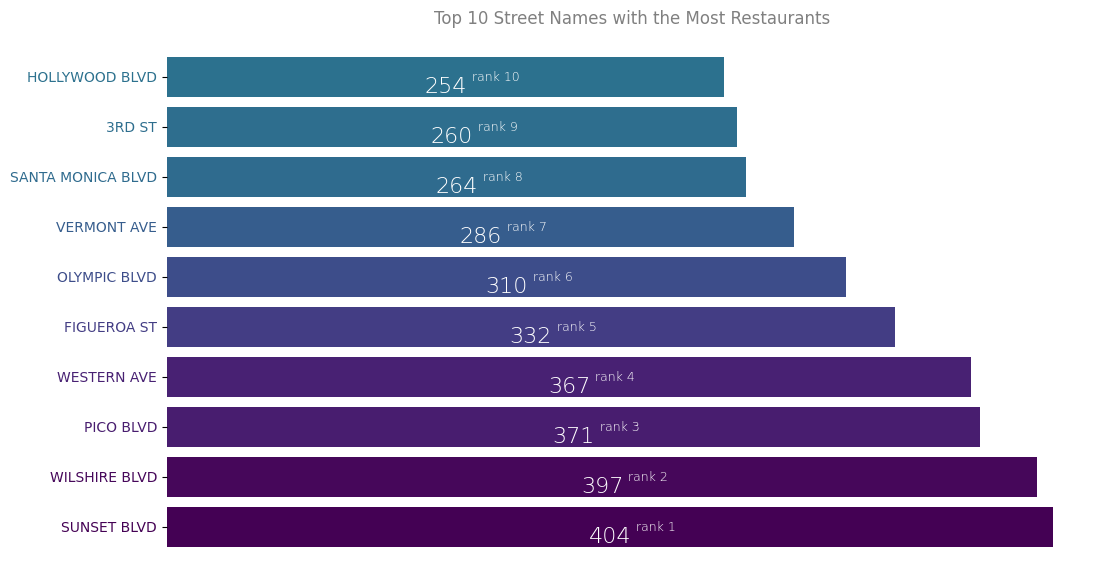

In [99]:
# Use the 'viridis' color palette with reversed colors
colors = viridis(1 - top_street_names / max(top_street_names))

# Create a horizontal bar chart
plt.figure(figsize=(12, 7))
bars = plt.barh(top_street_names.index, top_street_names, color=colors)

# Add value and rank inside each bar
for bar, count, color, street_name in zip(bars, top_street_names, colors, top_street_names.index):
    xval = bar.get_width()
    rank = top_street_names.index.get_loc(street_name) + 1
    
    # Add value inside each bar
    plt.text(xval / 2, bar.get_y() + bar.get_height() / 2, f'{count}', ha='center', va='top', color='white', fontsize=16, fontweight=200)

    # Add rank text to the right of each bar
    plt.text(xval / 2 + 12, bar.get_y() + bar.get_height() / 2, f'rank {rank}', ha='left', va='center', color='white', 
             fontsize=9, fontweight=200)

    # Set text color on the y-axis the same as the bar color
    plt.gca().yaxis.get_ticklabels()[list(top_street_names.index).index(street_name)].set_color(color)

# Remove spines on the x and y axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Add title
plt.title('Top 10 Street Names with the Most Restaurants', color='gray')

# Show the horizontal bar chart
plt.show()


Displays the contents of `top_street_names`

In [100]:
top_street_names

street_name
SUNSET BLVD          404
WILSHIRE BLVD        397
PICO BLVD            371
WESTERN AVE          367
FIGUEROA ST          332
OLYMPIC BLVD         310
VERMONT AVE          286
SANTA MONICA BLVD    264
3RD ST               260
HOLLYWOOD BLVD       254
Name: count, dtype: int64

**Conclusion**
1. SUNSET BLVD - 404 restaurants
2. WILSHIRE BLVD - 397 restaurants
3. PICO BLVD - 371 restaurants
4. WESTERN AVE - 367 restaurants
5. FIGUEROA ST - 332 restaurants
6. OLYMPIC BLVD - 310 restaurants
7. VERMONT AVE - 286 restaurants
8. SANTA MONICA BLVD - 264 restaurants
9. 3RD ST - 260 restaurants
10. HOLLYWOOD BLVD - 254 restaurants

<br>
The graph clearly shows the comparison of the number of restaurants on each street, and the addition of value and ranking text makes it more informative. The bar colors are arranged based on the number of restaurants providing good contrast. Streets with a higher number of restaurants have a lower rank and the graph also gives a good idea of the distribution of the number of restaurants on each street and makes it easier to identify the streets with the highest restaurant ratings.

[Back to Table of Contents](#back)

<a id='step2.8'></a>
### 2.8 Find the number of streets that have only one business (eating place)

Calculates the frequency of each value in the street_name column

In [101]:
street_name_counts = rest_df['street_name'].value_counts()

Find the number of paths that have only one business

In [102]:
single_business_streets = street_name_counts[street_name_counts == 1]

# Show the results
print(f"Number of roads that only have one business: {len(single_business_streets)}")

Number of roads that only have one business: 193


Displays `single business streets`

In [103]:
single_business_streets

street_name
MISSOURI AVE    1
VICTORIA AVE    1
EVANS ST        1
SPRING          1
BARRY AVE       1
               ..
MADISON AVE     1
MIRASOL ST      1
PARK TER        1
CORDOVA ST      1
TEMPLE AVE      1
Name: count, Length: 193, dtype: int64

**Conclusion**

<br>There are 193 roads that only have one business along them. This shows significant variation in the distribution of businesses across streets, where some streets may be more dominant in attracting business than others.

<br>Some examples of streets that only have one business include:
<br>WESTERN BLVD
<br>NAUD ST
<br>NORWALK BLVD
<br>CHEROKEE AVE
<br>PORTER ST
<br>...

<br>When a street only has one business, this can affect the business dynamics in that area. Some streets may have a high concentration of businesses, while others may have a greater variation in business types. There is also the possibility of incomplete addresses, resulting in existing street names.

[Back to Table of Contents](#back)

<a id='step2.9'></a>
### 2.9 For streets that are occupied by many businesses (eating places), pay attention to the distribution of the number of seats. What trends can you observe?

Retrieves data for the top ten street names

In [104]:
top_street_data = rest_df[rest_df['street_name'].isin(top_street_names.index)]

Create boxplot graphs

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\498260326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='number_seats', y='street_name', data=top_street_data, order=top_street_names.index,
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_6576\498260326.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, rotation=0, ha='right')


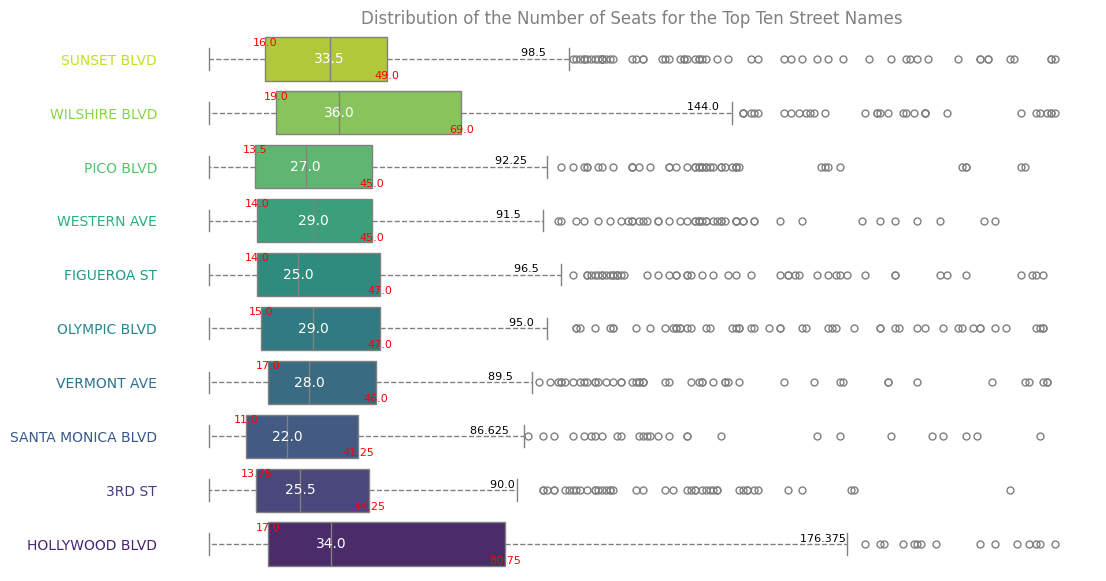

In [105]:
# Filter data for the top streets
top_street_data = rest_df[rest_df['street_name'].isin(top_street_names.index)]

# Create a boxplot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='number_seats', y='street_name', data=top_street_data, order=top_street_names.index,
                 palette='viridis_r', fliersize=5, whis=1.5, color='gray', boxprops=dict(edgecolor='gray'),
                 medianprops=dict(color='gray'), whiskerprops=dict(color='gray', linestyle='--'),
                 capprops=dict(color='gray'), flierprops=dict(markeredgecolor='gray'))

# Customize the plot
ax.set(xlabel=None, ylabel=None)
ax.set(xticklabels=[])  # Remove x-axis labels
sns.despine(left=True, right=True, top=True, bottom=True)
ax.tick_params(axis='y', which='both', left=False)  # Remove y-axis ticks
ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks

# Remove vertical grid lines
ax.xaxis.grid(False)

# Set y-axis labels and colors
yticklabels = [f"{street_name}" for street_name in top_street_names.index]
palette = sns.color_palette('viridis_r', len(top_street_names))

for label, color in zip(ax.get_yticklabels(), palette):
    label.set_color(color)

# Set y-axis label rotation
ax.set_yticklabels(yticklabels, rotation=0, ha='right')

# Display quartile values and maximum
medians = top_street_data.groupby('street_name')['number_seats'].median().loc[top_street_names.index]
q1 = top_street_data.groupby('street_name')['number_seats'].quantile(0.25).loc[top_street_names.index]
q3 = top_street_data.groupby('street_name')['number_seats'].quantile(0.75).loc[top_street_names.index]
whisker_max = q3 + 1.5 * (q3 - q1)

# Add annotations to the plot with white border
for i, street_name in enumerate(top_street_names.index):
    ax.text(medians[street_name], i, f'{medians[street_name]}', ha='center', va='center', color='white', fontsize=10, weight=500)
    ax.text(q1[street_name], i, f'{q1[street_name]}\n', ha='center', va='bottom', color='red', fontsize=8)
    ax.text(q3[street_name], i, f'\n{q3[street_name]}', ha='center', va='top', color='red', fontsize=8)
    ax.text(whisker_max[street_name], i, f'{whisker_max[street_name]}                     \n', ha='center', va='center',
            color='black', fontsize=8)

plt.title('Distribution of the Number of Seats for the Top Ten Street Names', color='gray')
plt.show()


Displays the distribution of `number_seats` for each unique value in `street_name` sorted by count

In [106]:
top_street_data.groupby('street_name')['number_seats'].describe().sort_values(by='count', ascending=False)

count       mean        std  min    25%   50%    75%    max
street_name                                                                   
SUNSET BLVD        404.0  47.819307  48.466197  1.0  16.00  33.5  49.00  229.0
WILSHIRE BLVD      397.0  52.695214  51.003915  1.0  19.00  36.0  69.00  229.0
PICO BLVD          371.0  40.544474  42.158902  1.0  13.50  27.0  45.00  221.0
WESTERN AVE        367.0  41.378747  41.936862  1.0  14.00  29.0  45.00  213.0
FIGUEROA ST        332.0  44.939759  48.247060  1.0  14.00  25.0  47.00  226.0
OLYMPIC BLVD       310.0  49.290323  54.624575  1.0  15.00  29.0  47.00  226.0
VERMONT AVE        286.0  45.325175  47.435746  1.0  17.00  28.0  46.00  227.0
SANTA MONICA BLVD  264.0  35.045455  40.358633  1.0  11.00  22.0  41.25  225.0
3RD ST             260.0  40.688462  42.302631  1.0  13.75  25.5  44.25  217.0
HOLLYWOOD BLVD     254.0  56.842520  58.427608  1.0  17.00  34.0  80.75  229.0

**Conclusion**

1. Distribution of Number of Seats:
- Streets with the name "HOLLYWOOD BLVD" have the highest average number of seats, followed by "WILSHIRE BLVD" and "SUNSET BLVD".
- The street with the name "SANTA MONICA BLVD" has the lowest average number of seats among the top ten streets.
2. Data Variability:
- There is significant variation in the number of seats for each street, shown by the width of the boxes on the boxplot.
- Streets with the name "HOLLYWOOD BLVD" also have a large interquartile range (IQR), showing significant variation between the first and third quartiles.
3. Outliers:
- Some roads have maximum values that are far above the third quartile, as can be seen from the dots above the whisker. This shows that there are outliers in the distribution of the number of seats.
4. Text Labels:
- Text labels on the graph provide additional information by showing the median value, first quartile, third quartile, and maximum value (with whisker factor).


The graph provides a good understanding of the distribution of the number of seats on each street, making it easy to compare and analyze the differences between them.

[Back to Table of Contents](#back)

<a id='step2.10'></a>
### 2.10 Make general conclusions and provide recommendations about the type of business and number of seats. Provide comments about franchise-based business development opportunities.

**Conclusion**

1. Most Type of Business: Restaurants are the most common type of business with 7,253 locations followed by Fast Food, Cafe, Pizza, Bar and Bakery.

2. Franchise vs. Non-Franchise: Of the total locations, approximately 38% are franchised. Restaurants and Bakeries have a high proportion of franchises, while Cafes and Bars have a lower proportion.

3. Average Number of Seats: Restaurants have the highest average seats (48 seats), followed by Bars (44 seats). Bakery has the lowest average seats (21 seats).

4. Top 3 Streets with the Most Locations:
- Sunset Blvd with 404 locations.
- Wilshire Blvd with 397 locations.
- Pico Blvd with 371 locations.
5. Analysis of Number of Seats Based on Road:
- Hollywood Blvd has the highest average seats (57 seats).
- Santa Monica Blvd has the lowest seat average (35 seats).
- Although Sunset Blvd has the most locations, the average seat is 48 seats.

**Recommendation**

1. Strategic Location: Considering a popular location like SUNSET BLVD, so I suggest renting a place for a cafe on SUNSET BLVD street with the highest traffic.

2. Focus on Restaurants: I suggest we consider changing the type of business from cafe to restaurant. Because on average restaurants attract more customers (75.2% compared to 4.5%) with more seats (48 compared to 25).

3. Franchise Development: If we are successful in launching this type of restaurant business and the business model consistently makes money, then the next stage in developing this business, I propose to consider creating a business in the form of a franchise.

4. Menu Innovation: We have a great concept for our establishment. This will attract customers, including tourists, because the use of robots in restaurants is quite rare.

5. Number of Seats: The restaurant to be established is recommended to have a total of 48 seats based on the average seats on SUNSET BLVD Street.


***Vital Records***

Business success is also influenced by other factors such as food quality, customer service, and market trends.
Before making a strategic decision, conducting further market research and listening to customer feedback can provide additional insight.
These recommendations are general and can be tailored to specific business needs and vision.

[Back to Table of Contents](#back)

<a id='step3'></a>
## Step 3. Prepare the presentation

Presentation Link

https://github.com/adikusum4/data-analyst-project/blob/main/Project%209/Robot%20Kafe.pdf

[Back to Table of Contents](#back)